## Artificial vortex array flow test

## Averaged flows


In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
import pickle 
import os
import sys
import pandas as pd

sys.path.append('../defect_functions') 
from defect_pairs import * 
from average_flows import * 

%matplotlib qt


# image_list = glob.glob(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps\*.tif")
image_list = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\ISF defects new\6\*.tif")
# image_list = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\10X defect\10 mix in red right panel\*.tif")
# image_list = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\20X defect\20 mix in red right panel\*.tif")
image_list = natsorted(image_list, key=lambda y: y.lower())

### Test flow parameters
`flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)`

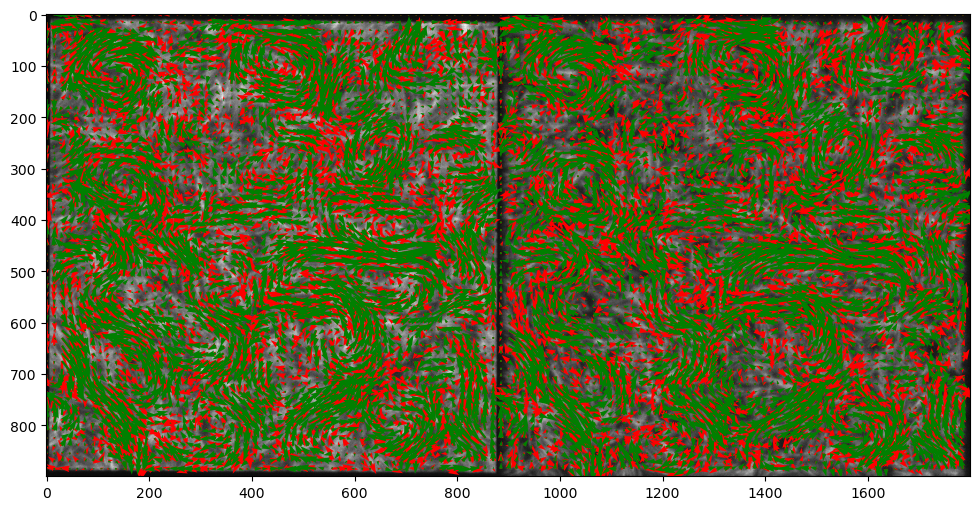

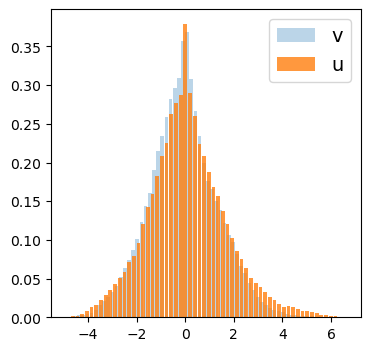

In [2]:
%matplotlib inline
skip = 1
n = 10 * skip

u = np.zeros_like(cv2.imread(image_list[0])[:,:,0], dtype=np.float32)
v = np.zeros_like(u)

for (i,im1), im2 in zip(enumerate(image_list[:n:skip]), image_list[1:n+1:skip]):

    img1 = cv2.imread(im1)[:,:,0]
    img2 = cv2.imread(im2)[:,:,0]
    flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0) 
    u += flow[..., 0]
    v += flow[..., 1]

step = 15
fig, ax1 = plt.subplots(1,1,  figsize=(12,6))
ax1.imshow(img1, cmap="gray")

x = np.arange(0, flow.shape[1], step, dtype=np.int16)
y = np.arange(0, flow.shape[0], step, dtype=np.int16)
ax1.quiver(x,y, 
        flow[::step, ::step, 0], -flow[::step, ::step, 1], 
        color="red", scale=150)
ax1.quiver(x,y, 
        u[::step, ::step]/(i+1), -v[::step, ::step]/(i+1), 
        color="green", scale=150)

fig, ax2 = plt.subplots(1,1,  figsize=(4,4))
ax2.hist(np.concatenate(v)/(i+1), 60, alpha=.3, rwidth=.9, density=True, label="v")
ax2.hist(np.concatenate(u)/(i+1),60, alpha=.8, rwidth=.8, density=True, label="u")
plt.legend(loc='upper right', fontsize=14)

In [ ]:
%matplotlib inline
SAVE = True
PLOT = False
CHECK  = False

for (i,im1), im2 in zip(enumerate(image_list[:-1]), image_list[1:]):
    #right image [:,900:,0] / left image [:,:900,0]
    img1 = cv2.imread(im1)[:,900:,0]
    img2 = cv2.imread(im2)[:,900:,0]
    flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)
    
    save_path = os.path.join(
        os.path.dirname(image_list[i]), 
        'OptFlow', 
        os.path.splitext(os.path.basename(image_list[i]))[0] + '_u_v.pkl'
        )
    step = 15   

    if PLOT:
        fig = plt.figure(figsize=(10,10))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img_clahe = clahe.apply(img1)
        plt.imshow(255-img_clahe, cmap="gray")

        x = np.arange(0, flow.shape[1], step, dtype=np.int16)
        y = np.arange(0, flow.shape[0], step, dtype=np.int16)
        plt.quiver(x,y, 
                flow[::step, ::step, 0], -flow[::step, ::step, 1], 
                color="red", scale=150, label="flow")
    
    if SAVE:  
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        scale = 3
        with open(save_path, 'wb') as f:
                pickle.dump(dict(u=flow[::scale,::scale,0], v=flow[::scale,::scale,1], scale=scale), f)
    
    if CHECK:
        with open(save_path, 'rb') as f:
            loaded_dict = pickle.load(f)  

        sstep = step//loaded_dict["scale"]
        plt.quiver(x, y,
                loaded_dict["u"][::sstep, ::sstep], -loaded_dict["v"][::sstep, ::sstep], 
                color="green", scale=200, label="dict")
    
    # break

    
    progressBar(i, len(image_list))
plt.legend(loc='upper right', fontsize=14)

In [13]:
minushalf.head()

charge      x     y  x_ind  y_ind      ang1      ang2      ang3  frame
0    -0.5   14.0  15.0     14     15 -0.125664  1.822124 -2.199115      1
1    -0.5  478.0  15.0    478     15 -2.324779 -0.439823  1.633628      1
2    -0.5  767.0  26.0    767     26 -2.701770  0.942478 -0.879646      1
3    -0.5  786.0  57.0    786     57 -2.324779  1.822124 -0.502655      1
4    -0.5  181.0  61.0    181     61  2.827433  0.502655 -1.256637      1

(array([89350., 63205., 53514., 80246., 84119., 99877., 94875., 75481.,
        78645., 90688.]),
 array([-1.57079399e+00, -1.25663495e+00, -9.42475915e-01, -6.28316939e-01,
        -3.14157903e-01,  1.13248825e-06,  3.14160168e-01,  6.28319204e-01,
         9.42478180e-01,  1.25663722e+00,  1.57079625e+00]),
 <BarContainer object of 10 artists>)

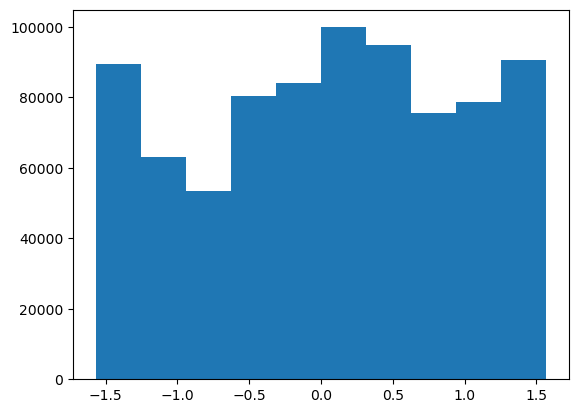

In [11]:
%matplotlib inline
plt.hist(ori.ravel())

In [5]:
%matplotlib qt
sigma = 11 #11 for 40x ; #5 for 0x ; #5 for 10x
PLOT = True
SAVE = True
minushalf_df = pd.DataFrame([])
plushalf_df = pd.DataFrame([])
if PLOT:
    fig, ax = plt.subplots(1,1, figsize=(6,6))
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    


for i,im1 in enumerate(image_list[:500]):
    img1 = cv2.imread(im1)[:,900:,0 ] # chose right or left part of the image
    # img1 = cv2.imread(im1)[:,:,0]
    ori, plushalf, minushalf = analyze_defects(img1, sigma=sigma)
    frame_num = int(os.path.splitext(os.path.basename(im1))[0].split("_X")[-1])
    minushalf['frame'] = frame_num
    plushalf['frame'] = frame_num
    minushalf_df = pd.concat([minushalf_df, minushalf], ignore_index=True)
    plushalf_df = pd.concat([plushalf_df, plushalf], ignore_index=True)

    if PLOT:
        ax.clear() 
        ax.axis('off')
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img_clahe = clahe.apply(img1)
        ax.imshow(img_clahe, cmap="gray")

        s = int(1.* sigma)
        x = np.arange(0, img1.shape[1], s)
        y = np.arange(0, img1.shape[0], s)

        ax.quiver(x,y, #xx[::s,::s], yy[::s,::s],
            np.cos(ori)[::s,::s], -np.sin(ori)[::s,::s], 
            headaxislength=0, headwidth=0, headlength=0, 
            color='red', scale=80, pivot='mid', alpha=.8)

        alpha_half, scale_half = .6, 30    
        ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=6, alpha=.6)
        ax.quiver(plushalf['x'], plushalf['y'], 
            np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), 
            headaxislength=0, headwidth=0, headlength=0, color='r', scale=scale_half, alpha=alpha_half)

        ax.plot(minushalf['x'], minushalf['y'],'bo',markersize=6, alpha=.6)
        for j in range(3):
            ax.quiver(minushalf['x'], minushalf['y'], 
                np.cos(minushalf['ang'+str(j+1)]), np.sin(minushalf['ang'+str(j+1)]), 
                headaxislength=0, headwidth=0, headlength=0, color='b', scale=scale_half, alpha=alpha_half)
        
        # ----- Save Images with overlay of defects and director field  -----
        if SAVE and PLOT:
            save_path = os.path.join(
                os.path.dirname(im1),
                'Defects',
                'Nematic1',
                'frame_' + str(i) + ".png"
                )
            # break
            ax.set_xlim([0, 900])
            ax.set_ylim([0, 900])
            os.makedirs(os.path.dirname(save_path), exist_ok=True)
            # fig.savefig(save_path, bbox_inches=extent.expanded(1.15, 1.15))

        break
    # ---------------- Save CSV ----------------
    # if not i %50:  
    #     save_path = os.path.join(os.path.dirname(im1), 'Defects', 'MinusHalf1.csv')
    #     os.makedirs(os.path.dirname(save_path), exist_ok=True)
    #     minushalf_df.to_csv(save_path)
    #     save_path = os.path.join(os.path.dirname(im1), 'Defects', 'PlusHalf1.csv')
    #     plushalf_df.to_csv(save_path)

    # save_path = os.path.join(
    #         os.path.dirname(im1), 
    #         'Nematic', 
    #         os.path.splitext(os.path.basename(im1))[0]
    #         )
    # os.makedirs(os.path.dirname(save_path), exist_ok=True)
    # cv2.imwrite(save_path + '_orient.tif', ori)
    # break

    progressBar(i, len(image_list))

# save_path = os.path.join(os.path.dirname(im1), 'Defects', 'MinusHalf1.csv')
# minushalf_df.to_csv(save_path)
# save_path = os.path.join(os.path.dirname(im1), 'Defects', 'PlusHalf1.csv')
# plushalf_df.to_csv(save_path)

In [129]:
save_path = os.path.join(os.path.dirname(im1), 'Defects', 'MinusHalf1.csv')
minushalf_df.to_csv(save_path)
save_path = os.path.join(os.path.dirname(im1), 'Defects', 'PlusHalf1.csv')
plushalf_df.to_csv(save_path)

### Defect movie for TrackMate

In [130]:
# minushalf_df = pd.read_csv(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps\Defects\MinusHalf1.csv")
# plushalf_df = pd.read_csv(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps\Defects\PlusHalf1.csv")
minushalf_df = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\MinusHalf1.csv")
plushalf_df = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusHalf1.csv")

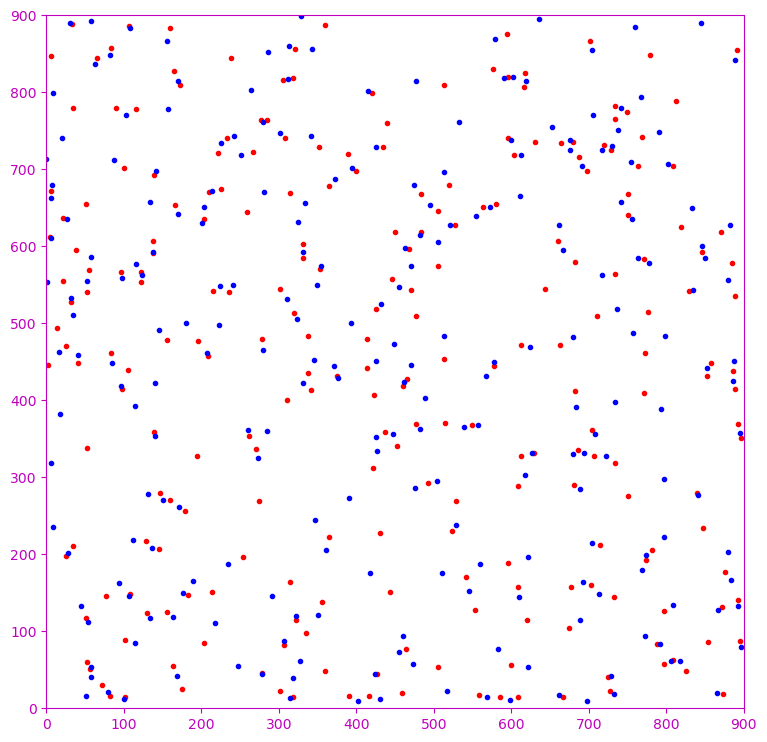

In [132]:
%matplotlib inline
import matplotlib

matplotlib.rc('axes', edgecolor='m')
plt.rcParams['xtick.color'] = 'm'
plt.rcParams['ytick.color'] = 'm'

frames = minushalf_df["frame"].unique()
white_frame = np.ones_like(cv2.imread(image_list[0]))[:,900:,:]
[height, width, _] = white_frame.shape

fig, ax = plt.subplots(1,1, figsize=(width//100, height//100))
# ax.set_axis_off()
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

for f_num,f in enumerate(frames):
    
    minushalf = minushalf_df[minushalf_df["frame"]==f]
    plushalf = plushalf_df[plushalf_df["frame"]==f]
    
    alpha_half, scale_half = .9, 40   
    ax.clear() 
    # ax.imshow(white_frame, "gray")
    ax.plot(plushalf['x'], plushalf['y'],'r.',markersize=6, alpha=1)
    # ax.quiver(plushalf['x'], plushalf['y'], 
    #     np.cos(plushalf['ang1']), -np.sin(plushalf['ang1']), 
    #     headaxislength=0, headwidth=0, headlength=0, color='r', scale=scale_half, alpha=alpha_half)

    ax.plot(minushalf['x'], minushalf['y'],'b.',markersize=6, alpha=1)
    # for i in range(3):
    #     ax.quiver(minushalf['x'], minushalf['y'], 
    #         np.cos(minushalf['ang'+str(i+1)]), -np.sin(minushalf['ang'+str(i+1)]), 
    #         headaxislength=0, headwidth=0, headlength=0, color='b', scale=scale_half, alpha=alpha_half)  

    save_path = os.path.join(
        os.path.dirname(image_list[0]),
        'Defects',
        'Nematic2',
        'frame_' + str(f) + ".png"
        )
    # break
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, bbox_inches=extent.expanded(1.15, 1.15))

    progressBar(f_num, len(frames))
    # break

- (1) Compute trajectories with TrackMate
- (2) Combine TrackMate and Defect CSVs

In [133]:
(os.path.dirname(image_list[0]) + r"\Defects\PlusTM_spots.csv",
os.path.dirname(image_list[0]) + r"\Defects\PlusHalf1.csv")

('C:\\Users\\victo\\Downloads\\SB_lab\\BEER_DATA\\20X defect\\20 mix in red right panel\\Defects\\PlusTM_spots.csv',
 'C:\\Users\\victo\\Downloads\\SB_lab\\BEER_DATA\\20X defect\\20 mix in red right panel\\Defects\\PlusHalf1.csv')

In [14]:
minushalf_df = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\MinusHalf1.csv")
plushalf_df = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusHalf1.csv")

minushalf_TM = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\MinusTM_spots.csv", skiprows=[1,2,3])
plushalf_TM = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusTM_spots.csv", skiprows=[1,2,3])

first_frame = minushalf_df["frame"].min() # Validate this number in image folders
last_frame = minushalf_df["frame"].max() # Validate this number in image folders

print("  ////////    PLUS   //////////")
print([(plushalf_TM[plushalf_TM["FRAME"]==i]).shape for i in range(10)])
print([(plushalf_df[plushalf_df["frame"]==i+first_frame]).shape for i in range(10)])

print("\n ////////    MINUS   //////////")
print([(minushalf_TM[minushalf_TM["FRAME"]==i]).shape for i in range(10)])
print([(minushalf_df[minushalf_df["frame"]==i+first_frame]).shape for i in range(10)])

  ////////    PLUS   //////////
[(142, 20), (140, 20), (142, 20), (145, 20), (147, 20), (148, 20), (144, 20), (163, 20), (156, 20), (145, 20)]
[(142, 10), (140, 10), (142, 10), (146, 10), (147, 10), (148, 10), (144, 10), (163, 10), (156, 10), (145, 10)]

 ////////    MINUS   //////////
[(141, 20), (140, 20), (141, 20), (145, 20), (146, 20), (146, 20), (142, 20), (161, 20), (152, 20), (142, 20)]
[(141, 10), (140, 10), (141, 10), (145, 10), (146, 10), (146, 10), (142, 10), (161, 10), (152, 10), (142, 10)]


In [44]:
X.shape, y.shape, first_frame

((490,), (504,), 1)

slope: 1.935424676909008 | intercept: -134.96276855999656
slope: 1.935424676909008 | intercept: -134.96276855999656
slope: 1.9354604533506978 | intercept: -134.8742274561283
-------  X  ------------
slope: 1.9477707857839779 | intercept: -66.94890479984736
slope: 1.9477707857839779 | intercept: -66.94890479984736
slope: 1.9479203341619242 | intercept: -67.09654007916703
-------  Y  ------------


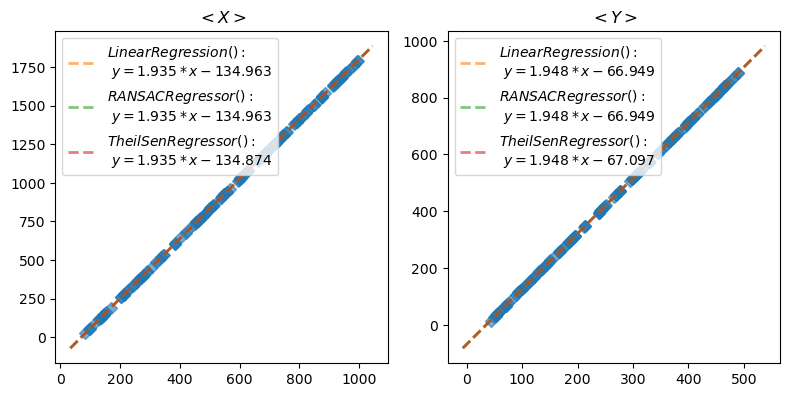

In [15]:
from sklearn import linear_model

%matplotlib inline
frame = 0

fig, axs = plt.subplots(1,2,  figsize=(8,16))

dims = ("x", "y")
lrs = (
    linear_model.LinearRegression(), 
    linear_model.RANSACRegressor(), 
    linear_model.TheilSenRegressor()
    )

slope_intercept = {}

for ax,dd in zip(axs, dims):
    ave_slope, ave_intercept = 0, 0

    X = minushalf_TM["POSITION_"+dd.upper()][minushalf_TM["FRAME"]==frame].iloc[:].sort_values().values
    y = minushalf_df[dd][minushalf_df["frame"]==first_frame+frame].iloc[:]

    if dd=="y":
        # !!! insert image height (e.g. 900)
        y = (900 - y) # y- values are flipped
    y = y.sort_values().values

    ax.plot(X, y, "D", alpha=.6)

    for lr in lrs:
        lr.fit(X.reshape(-1, 1), y)
        try:
            slope = lr.estimator_.coef_[0]
            intercept = lr.estimator_.intercept_
        except:
            slope = lr.coef_[0]
            intercept = lr.intercept_

        # use prints to set the SLOPE and INTERCEP globals in the next cell
        print('slope:', slope, '| intercept:', intercept)

        # prdict for line
        line_X = np.arange(X.min()-50, X.max()+50)[:, np.newaxis]
        line_y = lr.predict(line_X)

        ax.plot(line_X, line_y, "--", linewidth=2, alpha=.6,
                label="$%s:$\n $y= %.3f *x %.3f$" %(lr, slope, intercept))   
         
        ave_slope += slope  
        ave_intercept += intercept

    ax.set_title("$< %s >$" %dd.upper())

    ax.set_box_aspect(1)
    ax.legend(loc='upper left')
    print("-------  %s  ------------" %dd.upper())

    slope_intercept[dd] = {"slope": ave_slope/len(lrs),
                             "intercept": ave_intercept/len(lrs)
                             }

    # ave_slope = ave_slope/len(lrs)
    # ave_intercept = ave_intercept/len(lrs)
plt.tight_layout()

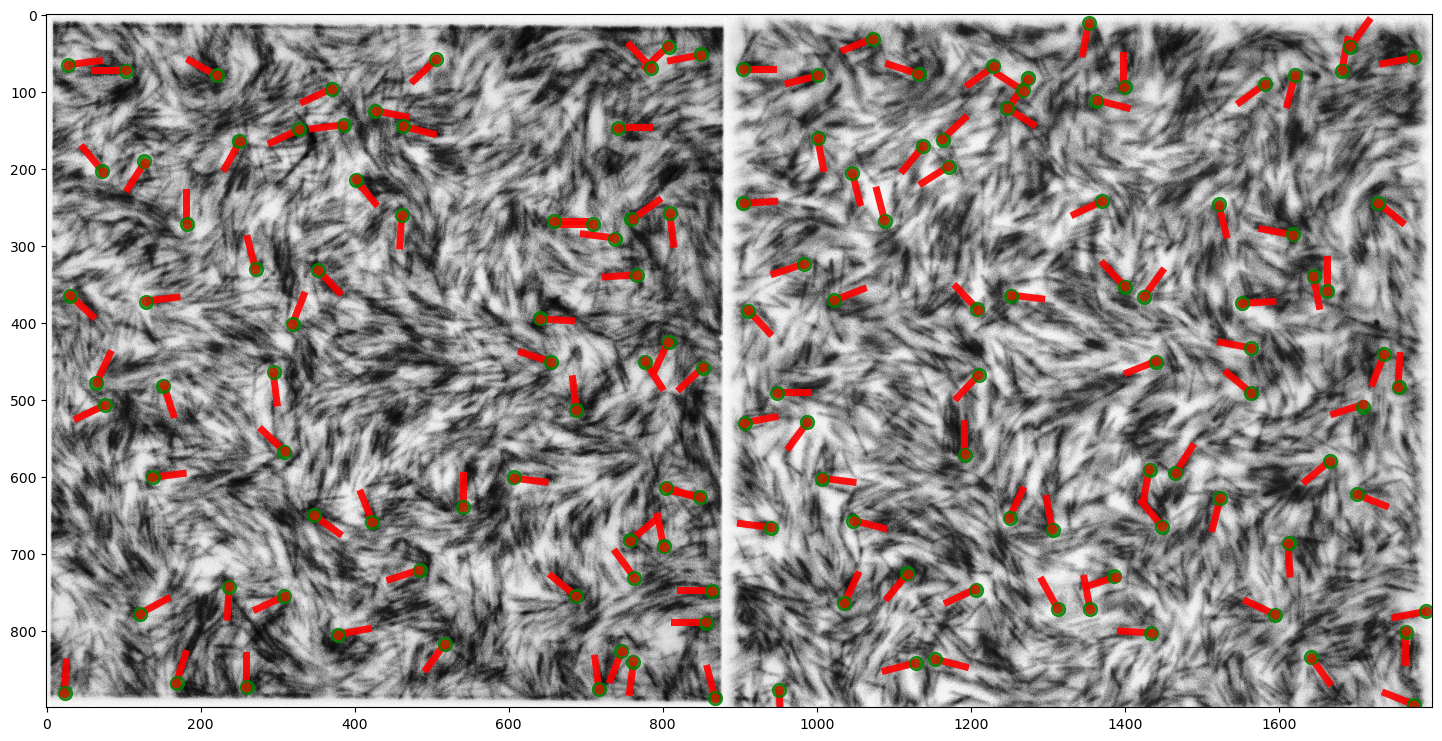

In [22]:
%matplotlib inline
SLOPEx = slope_intercept["x"]["slope"]
INTERCEPTx = slope_intercept["x"]["intercept"]
SLOPEy = slope_intercept["y"]["slope"]
INTERCEPTy = slope_intercept["y"]["intercept"]
frame = 0

# image_list_all = glob.glob(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps/*.tif")
image_list_all = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\ISF defects new\6\*.tif")
# image_list_all = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\10X defect\10 mix in red right panel\*.tif")
# image_list_all = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\20X defect\20 mix in red right panel\*.tif")
image_list = natsorted(image_list_all, key=lambda y: y.lower())
image_list = image_list_all[first_frame-1:last_frame-1:1]
im1 = image_list[0]

plushalf_df = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusHalf1.csv")
plushalf_TM = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusTM_spots.csv", skiprows=[1,2,3])

# Apply Contrast Limited Adaptive Histogram Equalization
img1 = cv2.imread(im1)[:,:,0]#[:,:,0]#
h_img, w_img = img1.shape
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img1)

fig, ax = plt.subplots(1,1, figsize=(img1.shape[1]//100,img1.shape[0]//100))
ax.imshow(255-img_clahe, "gray")

x = plushalf_TM["POSITION_X"][plushalf_TM["FRAME"]==frame].iloc[:].values * SLOPEx + INTERCEPTx
y = h_img - (plushalf_TM["POSITION_Y"][plushalf_TM["FRAME"]==frame].iloc[:].values * SLOPEy + INTERCEPTy)
ax.plot(x, y,'go',markersize=10, alpha=.8)

alpha_half, scale_half = .9, 40  
p_df =  plushalf_df[plushalf_df["frame"]==first_frame+frame]
ax.plot(p_df['x'], p_df['y'],'ro',markersize=6, alpha=.6)
ax.quiver(p_df['x'], p_df['y'], 
    np.cos(p_df['ang1']), -np.sin(p_df['ang1']), 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=scale_half, alpha=alpha_half)

In [24]:
%matplotlib qt

minushalf_df = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\MinusHalf1.csv")
plushalf_df = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusHalf1.csv")

minushalf_TM = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\MinusTM_spots.csv", skiprows=[1,2,3])
plushalf_TM = pd.read_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusTM_spots.csv", skiprows=[1,2,3])

first_frame = minushalf_df["frame"].min() # Validate this number in image folders

plushalf_TM["x_img"] = plushalf_TM["POSITION_X"] * SLOPEx + INTERCEPTx
plushalf_TM["y_img"] = h_img - (plushalf_TM["POSITION_Y"] * SLOPEy + INTERCEPTy)
minushalf_TM["x_img"] = minushalf_TM["POSITION_X"] * SLOPEx + INTERCEPTx
minushalf_TM["y_img"] = h_img - (minushalf_TM["POSITION_Y"] * SLOPEy + INTERCEPTy)

# find same dots and check
dfs_TM = [plushalf_TM, minushalf_TM]
dfs_ori = [plushalf_df, minushalf_df]

for df_TM, df_ori in zip(dfs_TM, dfs_ori):
    xy_ori = np.array([df_ori["x"], df_ori["y"]]).T
    xy_TM = np.array([df_TM["x_img"].values, df_TM["y_img"].values]).T
    _,idx = center_pairs(
        xy_ori, #Long Array
        xy_TM #Short Array
        ) 
    # break
    print(xy_ori[idx[100:103]],'\n', xy_TM[100:103],'\n', df_ori[['x', 'y']].loc[idx[100:103]].values)
    print("--------------")

    # replace and add angles
    df_TM[['x_img1','y_img1','ang1','ang2','ang3','charge']] =  df_ori[['x', 'y','ang1','ang2','ang3','charge']].iloc[idx[:]].values


[[ 809.  258.]
 [1729.  244.]
 [ 904.  245.]] 
 [[ 809.55980711  257.99140533]
 [1728.89219324  244.35666088]
 [ 904.39620062  244.35666088]] 
 [[ 809.  258.]
 [1729.  244.]
 [ 904.  245.]]
--------------
[[ 858.  781.]
 [ 941.  688.]
 [1773.  697.]] 
 [[ 857.94572217  781.95515621]
 [ 941.16949607  688.45976572]
 [1773.4072351   696.25104826]] 
 [[ 858.  781.]
 [ 941.  688.]
 [1773.  697.]]
--------------


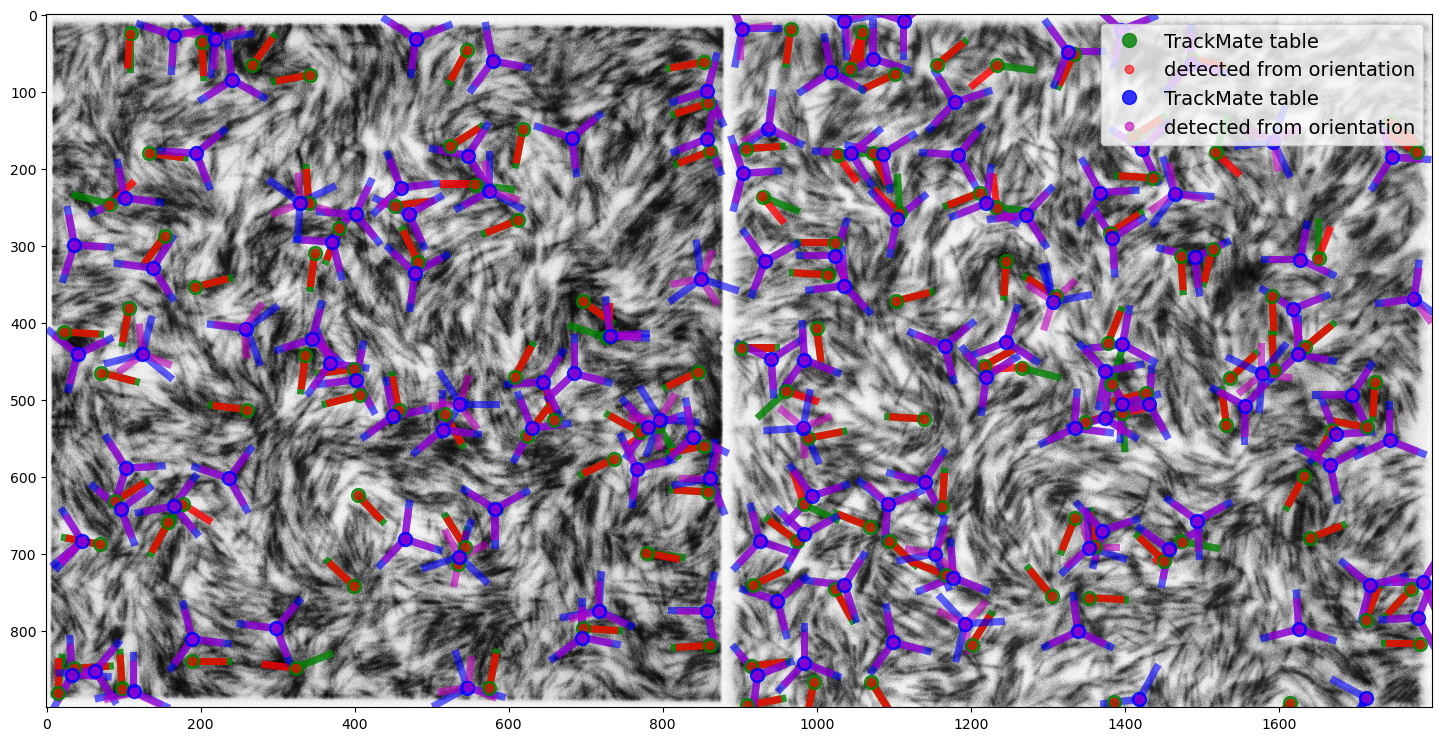

In [25]:
# test replaced values
%matplotlib inline
frame = 50

# image_list_all = glob.glob(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps/*.tif")
image_list_all = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\ISF defects new\6\*.tif")
# image_list_all = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\10X defect\10 mix in red right panel\*.tif")
# image_list_all = glob.glob(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\20X defect\20 mix in red right panel\*.tif")
image_list_all = natsorted(image_list_all, key=lambda y: y.lower())
image_list = image_list_all[first_frame-1:last_frame-1:1]
im1 = image_list[frame]

# Apply Contrast Limited Adaptive Histogram Equalization
img1 = cv2.imread(im1)[:,:,0]# [:,:,0]#
h_img, w_img = img1.shape
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img1)

fig, ax = plt.subplots(1,1, figsize=(img1.shape[1]//100,img1.shape[0]//100))
ax.imshow(255-img_clahe, "gray")

# +1/2
idx = plushalf_TM["FRAME"]==frame
ax.plot(plushalf_TM["x_img1"][idx],
        plushalf_TM["y_img1"][idx],'go',
        markersize=10, alpha=.8, label="TrackMate table")
ax.quiver(plushalf_TM['x_img1'][idx], plushalf_TM['y_img1'][idx], 
    np.cos(plushalf_TM['ang1'][idx]), -np.sin(plushalf_TM['ang1'][idx]), 
    headaxislength=0, headwidth=0, headlength=0, color='g', scale=35, alpha=.8)        

p_df =  plushalf_df[plushalf_df["frame"]==first_frame+frame]
ax.plot(p_df['x'], p_df['y'],'ro',markersize=6, alpha=.6, label="detected from orientation")
ax.quiver(p_df['x'], p_df['y'], 
    np.cos(p_df['ang1']), -np.sin(p_df['ang1']), 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=40, alpha=.8)

# -1/2
idx = minushalf_TM["FRAME"]==frame
ax.plot(minushalf_TM["x_img1"][idx],
        minushalf_TM["y_img1"][idx],'bo',
        markersize=10, alpha=.8, label="TrackMate table")
for i in range(3):
    ax.quiver(minushalf_TM["x_img1"][idx], minushalf_TM["y_img1"][idx], 
        np.cos(minushalf_TM['ang'+str(i+1)][idx]), -np.sin(minushalf_TM['ang'+str(i+1)][idx]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=35, alpha=.6)    

m_df =  minushalf_df[minushalf_df["frame"]==first_frame+frame]
ax.plot(m_df['x'], m_df['y'],'mo',markersize=6, alpha=.6, label="detected from orientation")
for i in range(3):
    ax.quiver(m_df["x"][idx], m_df["y"][idx], 
        np.cos(m_df['ang'+str(i+1)][idx]), -np.sin(m_df['ang'+str(i+1)][idx]), 
        headaxislength=0, headwidth=0, headlength=0, color='m', scale=45, alpha=.6)    

ax.legend(loc='upper right', fontsize=14)

In [140]:
os.path.dirname(image_list[0]) + r"\Defects\PlusAndMinusTM.csv"

'C:\\Users\\victo\\Downloads\\SB_lab\\BEER_DATA\\10X defect\\10 mix in red right panel\\Defects\\PlusAndMinusTM.csv'

In [146]:
# Join TrackMate tabels for +1/2 and -1/2
pd.concat([plushalf_TM, minushalf_TM]).to_csv(os.path.dirname(image_list[0]) + r"\Defects\PlusAndMinusTM.csv")

# Start Here Find Pairs

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
from scipy.ndimage import gaussian_filter
from scipy import spatial
from sklearn.neighbors import KDTree
from scipy.stats import circmean, circstd
import os
import sys
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sys,time,random
from joblib import Parallel, delayed

sys.path.append('../defect_functions') 
from defect_pairs import * 
from average_flows import * 

PAIR_DIST_THRESH = 10 #C2C12:25 RPE1=15
MINIMAL_TRACK_LENGTH = 1
MINIMAL_TRACK_ANALYSIS = 10
DIST = 80 #C2C12:80 RPE1=50

all_pairs_df = []

plus_minus_df = pd.read_csv(r'C:\Users\victo\Downloads\SB_lab\BEER_DATA\ISF defects new\6\Defects\PlusAndMinusTM.csv').dropna(subset=['TRACK_ID'])

all_pairs_df.append(trajectory_pair_list(plus_minus_df, minimal_track=MINIMAL_TRACK_LENGTH, dist_thresh=PAIR_DIST_THRESH))

print(all_pairs_df[-1].shape)
print("Number of tracks: ", len(np.unique(all_pairs_df[-1].min_id)))


all_pairs_df = pd.concat(all_pairs_df)
print("Total number of paired spots: ", all_pairs_df.shape[0])
''' -- ADD ---
1) distance btw pairs 
2)angle btw + and - centers 
3) fusion/creation 
'''
all_pairs_df["distance"] = (
    (all_pairs_df["xm"]-all_pairs_df["xp"])**2 + (all_pairs_df["ym"]-all_pairs_df["yp"])**2
    )**.5

all_pairs_df["mp_angle"] = np.arctan2(all_pairs_df["ym"]-all_pairs_df["yp"], 
                                      all_pairs_df["xm"]-all_pairs_df["xp"]) % (2*np.pi)


all_pairs_df["angp1_rel"] = (all_pairs_df["angp1"] - all_pairs_df["mp_angle"]) % (2*np.pi)
for i in range(3):
    all_pairs_df["angm"+str(i+1)+"_rel"] = (all_pairs_df["angm"+str(i+1)] - all_pairs_df["mp_angle"]) % (2*np.pi)

grouped = all_pairs_df.groupby('plus_id')["angp1_rel"]
all_pairs_df["fuse_up"] = grouped.transform(lambda x: circmean(x)>np.pi)

all_pairs_df["p_vel_angle"] = np.arctan2(all_pairs_df.groupby('plus_id')["yp"].diff(periods=3).fillna(0), 
                                        all_pairs_df.groupby('plus_id')["xp"].diff(periods=3).fillna(0))

all_pairs_df["p_vel_angle_rel"] = all_pairs_df["p_vel_angle"] - all_pairs_df["mp_angle"]                                 
all_pairs_df["p_vel_angle_rel"][all_pairs_df["p_vel_angle"]==0] = 0
# TODO p_angle relative to trajectory path
all_pairs_df["angp1_rel_vel_angle"] = (all_pairs_df["angp1"]- all_pairs_df["p_vel_angle"]) %(2*np.pi)

print("Total number of paired trajectories: ", str(len(all_pairs_df.plus_id.unique())))
grouped = all_pairs_df.groupby('min_id')["distance"]
all_pairs_df["fusion"] = grouped.transform(lambda x: x[:len(x)//2].mean()>x[len(x)//2:].mean())


(43478, 10)
Number of tracks:  5607
Total number of paired spots:  43478
Total number of paired trajectories:  4796


C:\Users\victo\AppData\Local\Temp\ipykernel_31620\3002674337.py:69: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  all_pairs_df["fusion"] = grouped.transform(lambda x: x[:len(x)//2].mean()>x[len(x)//2:].mean())


In [83]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
from scipy.ndimage import gaussian_filter
from scipy import spatial
from sklearn.neighbors import KDTree
from scipy.stats import circmean, circstd, sem
import os
import sys
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sys,time,random

sys.path.append('../defect_functions') 
from defect_pairs import * 
from average_flows import *  

import matplotlib

matplotlib.rc('axes', edgecolor='k')
plt.rcParams['xtick.color'] = 'k'
plt.rcParams['ytick.color'] = 'k'

# plus_minus_df = pd.read_csv(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps\Defects/PlusAndMinusTM.csv")
plus_minus_df = pd.read_csv(r'C:\Users\victo\Downloads\SB_lab\BEER_DATA\ISF defects new\6\Defects\PlusAndMinusTM.csv')
# plus_minus_df = pd.read_csv(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\10X defect\10 mix in red right panel\Defects\PlusAndMinusTM.csv")
# plus_minus_df = pd.read_csv(r"C:\Users\victo\Downloads\SB_lab\BEER_DATA\20X defect\20 mix in red right panel\Defects\PlusAndMinusTM.csv")
plus_minus_df.head()

Unnamed: 0    LABEL     ID  TRACK_ID    QUALITY  POSITION_X  POSITION_Y  \
0           0  ID84543  84543       NaN  73.665619       987.0        36.0   
1           1  ID84545  84545       0.0  81.421524        82.0        44.0   
2           2  ID84544  84544       1.0  81.146553       518.0        41.0   
3           3  ID84547  84547       2.0  81.421524       440.0        47.0   
4           4  ID84546  84546       3.0  81.421516       561.0        46.0   

   POSITION_Z  POSITION_T  FRAME  ...  CONTRAST_CH1   SNR_CH1        x_img  \
0         0.0         0.0      0  ...      0.902819  1.316414  1775.134982   
1         0.0         0.0      0  ...      0.973672  1.625018    23.677968   
2         0.0         0.0      0  ...      0.971355  1.623056   867.473834   
3         0.0         0.0      0  ...      0.973672  1.625018   716.519528   
4         0.0         0.0      0  ...      0.973672  1.625018   950.692233   

        y_img  x_img1  y_img1      ang1  ang2  ang3  charge  
0  896.827498  1776.0   896.0 -2.764602   NaN   NaN     0.5  
1  881.240928    23.0   881.0 -0.062832   NaN   NaN     0.5  
2  887.085892   867.0   887.0 -1.633628   NaN   NaN     0.5  
3  875.395964   716.0   875.0 -0.062832   NaN   NaN     0.5  
4  877.344285   951.0   877.0  1.507964   NaN   NaN     0.5  

[5 rows x 29 columns]

In [172]:
%matplotlib inline

msd_plus_dfL = msd_from_df(plus_minus_df[(plus_minus_df.charge==.5)&(plus_minus_df.x_img<900)],"x_img1","x_img1","FRAME","TRACK_ID")
msd_minus_dfL = msd_from_df(plus_minus_df[(plus_minus_df.charge==-.5)&(plus_minus_df.x_img<900)],"x_img1","x_img1","FRAME","TRACK_ID")
# msd_plus_dfR = msd_from_df(plus_minus_df[(plus_minus_df.charge==.5)&(plus_minus_df.x_img>900)],"x_img1","x_img1","FRAME","TRACK_ID")
# msd_minus_dfR = msd_from_df(plus_minus_df[(plus_minus_df.charge==-.5)&(plus_minus_df.x_img>900)],"x_img1","x_img1","FRAME","TRACK_ID")

# msd_plus_df.plot.scatter("FRAME", "MSD", logx=True, logy=True, ax=ax1, c="b", alpha=.05)
# msd_minus_df.plot.scatter("FRAME", "MSD", logx=True, logy=True, ax=ax1, c="g", alpha=.05)

In [ ]:
fig, ax2 = plt.subplots(1,1, figsize=(5,5))
win = 1

for msd_df,color in zip([msd_plus_dfL, msd_minus_dfL,msd_plus_dfR, msd_minus_dfR], ["r","r","g","g"]):
# for msd_df,color in zip([msd_plus_dfL, msd_minus_dfL], ["r","r"]):

    msd_df = msd_df.sort_values(by="FRAME")
    msd_df["ave"] = roll_func(msd_df.MSD, msd_df.FRAME, win, func=np.mean)
    msd_df["std"] = roll_func(msd_df.MSD, msd_df.FRAME, win, func=np.std)
    msd_df["count"] = roll_func(msd_df.MSD, msd_df.FRAME, win, np.sum)

    ax2.plot(msd_df.FRAME, msd_df["ave"], "-", color=color, alpha=.6, linewidth=3)
    ax2.fill_between(msd_df.FRAME, 
                    msd_df["ave"]-msd_df["std"]/msd_df["count"]**.5, 
                    msd_df["ave"]+msd_df["std"]/msd_df["count"]**.5, 
                    color=color, alpha=.2) 

ax2.plot([0,0],[0,0], "-", color="r", linewidth=3, label=r"$+1/2 left$")
ax2.plot([0,0],[0,0], "-", color="r", linewidth=3, label=r"$-1/2 left$")
ax2.plot([0,0],[0,0], "-", color="g", linewidth=3, label=r"$+1/2 right$")
ax2.plot([0,0],[0,0], "-", color="g", linewidth=3, label=r"$-1/2 right$")

xref = np.arange(8, 15, 1)
ax2.plot(xref, 4e1*xref**2, "--k", xref, 3e2*xref**1, "--k",)
ax2.text(xref[0], 4e1*xref[-1]**2, r"$exp=2$", )
ax2.text(xref[-1], 3e2*xref[-1]**1, r"$exp=1$")
ax2.set_xscale('log'); ax2.set_yscale('log')
ax2.set_xlabel(r"$Time ~()$", fontsize=14); ax2.set_ylabel(r"$MSD ~(px^2)$", fontsize=14)
plt.legend(loc='upper left', fontsize=12); plt.tight_layout()
# plt.xlim([1,100]);plt.ylim([1e2,1e5])

In [86]:
# # from scipy import spatial
# # def center_pairs(Xlong, Xshort):
# #     '''find indexes of Xshort in Xlong'''
# #     tree = spatial.KDTree(Xlong)
# #     return tree.query(Xshort)   

# pairs = []

# plus_minus_df["FRAME"].unique()[-1]
# for frame in plus_minus_df["FRAME"].unique()[:]:
#     # print(frame)
#     p_idx = np.logical_and(plus_minus_df["FRAME"]==frame, plus_minus_df["charge"]==.5)
#     m_idx = np.logical_and(plus_minus_df["FRAME"]==frame, plus_minus_df["charge"]==-.5)
#     plus_xy = plus_minus_df[["TRACK_ID","x_img1","y_img1","ang1"]][p_idx]
#     minus_xy = plus_minus_df[["TRACK_ID","x_img1","y_img1","ang1","ang2","ang3"]][m_idx]

#     dist, idx = center_pairs(minus_xy[["x_img1","y_img1"]], plus_xy[["x_img1","y_img1"]])
#     # set a distance that define that defects are a pair (50)
#     dist_tresh = dist< 10 # was 30
#     # Notice: some TRACK_IDs are nan, meaning that they are not a part from any trajectory
#     pairs.append([
#         minus_xy["TRACK_ID"].iloc[idx][dist_tresh].values,#.astype(np.int_), 
#         plus_xy["TRACK_ID"][dist_tresh].values,#.astype(np.intc)
#         dist[dist_tresh]
#         ]) 

# # pairs_df = pd.DataFrame(np.concatenate(pairs, axis=1).T, columns=["minus", "plus"]).dropna().drop_duplicates()    
# pairs_df = pd.DataFrame(np.concatenate(pairs, axis=1).T, columns=["minus", "plus","dist"]).dropna().drop_duplicates()
# _, indices = np.unique(pairs_df["minus"], return_index=True)
# pairs_df = pairs_df.iloc[indices].copy()

In [ ]:
# %matplotlib qt

# def equlalize_trajectories(plus_minus_df, p_idx, m_idx):
#     ''' makes sure that positive (p_idx) and negative (m_idx) defect trajectory are equal
#     according to "FRAME" number
#     if missing frame for one of them it removed with dropna()
#     '''
#     df1 = plus_minus_df[["TRACK_ID","FRAME","x_img1","y_img1","ang1"]][p_idx]
#     df1.set_index('FRAME', inplace=True)
#     df2 =  plus_minus_df[["TRACK_ID","FRAME", "x_img1","y_img1", "ang1","ang2","ang3" ]][m_idx]
#     df2.set_index('FRAME', inplace=True)
#     df_ = pd.concat([df1, df2], axis=1).dropna()
#     return df_.set_axis(["plus_id","xp","yp","angp1", "min_id","xm","ym", "angm1","angm2","angm3"], axis=1)

# minimal_track = 5
# PLOT = False

# fig, ax = plt.subplots(1,1, figsize=(10,10))
# ax.set_box_aspect(1)
# plt.set_cmap('plasma')
# count = 0
# mp_distance = []
# mp_distance_fusion = []
# mp_distance_creation = []
# pair_stat = []
# all_pairs_df = []
# fusion_TF = 1
# for (num,m), n in zip(enumerate(pairs_df["minus"]), pairs_df["plus"]):
#     m_idx = np.logical_and(plus_minus_df["TRACK_ID"]==m, plus_minus_df["charge"]==-.5)
#     p_idx = np.logical_and(plus_minus_df["TRACK_ID"]==n, plus_minus_df["charge"]==.5)
#     # minimal track length (20 frames)
#     if m_idx.sum()>minimal_track and p_idx.sum()>minimal_track:

#         count +=1
#         dff_ = equlalize_trajectories(plus_minus_df, p_idx, m_idx)
#         all_pairs_df.append(dff_)
#         # "xp","yp", "angp1", "xm","ym", "angm1","angm2","angm3" 
#         xm, ym = dff_["xm"].values, dff_["ym"].values
#         xp, yp = dff_["xp"].values, dff_["yp"].values
#         thm = np.array((
#             dff_["angm1"].values, 
#             dff_["angm2"].values,
#             dff_["angm3"].values
#         ))
#         thp = dff_["angp1"].values
#         # thp[thp<0] = thp[thp<0] + 2*np.pi 

#         pair_distance = ((xm-xp)**2 + (ym-yp)**2)**.5
#         mp_distance.append(pair_distance)
        
#         # if distance decrease = fusion
#         fusion = pair_distance[:len(pair_distance)//2].mean() > pair_distance[len(pair_distance)//2:].mean()
#         if fusion:
#             fusion_TF = 1
#             mp_distance_fusion.append(pair_distance)
#         else:
#             fusion_TF = -1
#             mp_distance_creation.append(pair_distance)
        
#         # angle btw defect centers
#         mp_angle = np.arctan2(ym-yp, xm-xp) 
#         mp_angle[mp_angle<0] = mp_angle[mp_angle<0] + 2*np.pi
        
#         # displacment angle of =1/2 defect
#         p_vel_angle = np.arctan2(np.diff(yp), np.diff(xp)) 
#         p_vel_angle[p_vel_angle<0] = p_vel_angle[p_vel_angle<0] + 2*np.pi

#         diff_thm = (thm - thp).T
#         diff_thm[diff_thm<0] = diff_thm[diff_thm<0] + 2*np.pi
        
#         thm_min = np.min(np.abs(diff_thm), axis=1) + thp
#         thm_min[thm_min<0] = thm_min[thm_min<0] + 2*np.pi
#         pair_stat.append([thp-circmean(mp_angle), #np.median(mp_angle)
#                           thm-circmean(mp_angle), 
#                           p_vel_angle-circmean(mp_angle), 
#                           (thp[:1]-p_vel_angle)%(2*np.pi),
#                           fusion_TF * pair_distance # negative distance is creation
#                         ])

#         if PLOT:
#             for i in range(3):
#                 ax.quiver(xm, ym, np.cos(thm[i]), np.sin(thm[i]),color="b", alpha=.3, scale=40)

#             ax.quiver(xp, yp, np.cos(thp), np.sin(thp),color="r", alpha=.2)
#             ax.quiver(xm, ym, np.cos(thm_min), np.sin(thm_min),color="m", alpha=.3, scale=40)

#             ax.quiver(xp[-1], yp[-1], np.cos(thp[-1]), np.sin(thp[-1]),color="r", alpha=.6, scale=15)
#             ax.quiver(xm[-1], ym[-1], np.cos(thm_min[-1]), np.sin(thm_min[-1]),color="b", alpha=.6, scale=15)

#             ax.scatter(xm, ym, c=np.arange(len(xm)), s=40, alpha=.8)
#             ax.scatter(xp, yp, c=np.arange(len(xp)), s=40, alpha=.8)
#             # ax.text(xp[-1]-10, yp[-1]+10, str((thp[-1]*180/np.pi)//1), fontsize=20)
#             ax.text(xp[-1], yp[-1], "%s" %str(((thp[-1]-circmean(mp_angle))*180/np.pi)//1 % 360) , fontsize=20)
#             ax.text(xm[-1], ym[-1], "%s" %str(((thm.min()-circmean(mp_angle))*180/np.pi)//1 % 360) , fontsize=20)
    
#     progressBar(num, len(pairs_df))
#     # break

# all_pairs_df = pd.concat(all_pairs_df)

# # all_pairs_df.to_csv(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps\Defects\all_Pairs.csv")

In [89]:
# # pair_stat.append([thp-circmean(mp_angle), #np.median(mp_angle)
# #                     thm-circmean(mp_angle), 
# #                     p_vel_angle-circmean(mp_angle), 
# #                     (thp[:1]-p_vel_angle)%(2*np.pi),
# #                     pair_distance
# #                 ])
# df = pd.DataFrame(data={
#     "p_ang": np.concatenate([p[0] for p in pair_stat]), 
#     "m_ang1": np.concatenate([p[1][0] for p in pair_stat]),
#     "m_ang2": np.concatenate([p[1][1] for p in pair_stat]), 
#     "m_ang3": np.concatenate([p[1][2] for p in pair_stat]), 
#     # "p_vel_angle": np.concatenate([p[2] for p in pair_stat]), 
#     # "X": np.concatenate(pair_stat)[:,3], 
#     "distance": np.concatenate([pair[4] for pair in pair_stat]), 
#     }).dropna()


In [ ]:
# %matplotlib inline
# dist = 100
# bins_number = 30  # the [0, 360) interval will be subdivided into this
# # number of equal bins
# bins = np.linspace(0, 2*np.pi, bins_number+1)
# width = 2 * np.pi / bins_number

# fig3 = plt.figure(figsize=(6,6))
# ax1 = plt.subplot(221)
# ax2 = plt.subplot(222, projection='polar')
# ax3 = plt.subplot(223)
# ax4 = plt.subplot(224, projection='polar')
# ax1.set_ylabel("$PDF$", fontsize=12)
# ax1.set_xlabel("$Ang~(deg)$", fontsize=12)

# df_f = df[df["distance"]>0].copy()
# df_cr = df[df["distance"]<0].copy()

# # df1 = df_f[np.logical_and(
# #                     df_f["distance"]>40, 
# #                     df_f["distance"]<60,
# #                    )].copy()

# df1 = df_f.copy()
# # df1 = df_cr.copy()
# df1["distance"] = df1["distance"].abs()

# m_ang_close, m_ang_far, m_ang_all = [], [], []
# for i in range(3):
#     m_ang_close.append(df1["m_ang"+str(i+1)][df1["distance"]<dist].values)
#     m_ang_far.append(df1["m_ang"+str(i+1)][df1["distance"]>dist].values)
#     m_ang_all.append(df1["m_ang"+str(i+1)].values)
#     # break
# m_ang_close = np.concatenate(m_ang_close)
# m_ang_far = np.concatenate(m_ang_far)
# m_ang_all = np.concatenate(m_ang_all)  

# # p0,_,_ = ax3.hist((m_ang_all % (2*np.pi))*180/np.pi, bins*180/np.pi, 
# #                     density=True, rwidth=.9, alpha=.3, color="red",
# #                     label="all [#%s]" %(len(m_ang_all))
# #                     )
# # ax4.bar(bins[:bins_number], p0, width=width, bottom=0.0, alpha=.4, color="red")

# p0,_,_ = ax3.hist((m_ang_far % (2*np.pi))*180/np.pi, bins*180/np.pi, 
#                     density=True, rwidth=.9, alpha=.3, color="green",
#                     label="d>%s [#%s]" %(dist, len(m_ang_far))
#                     )
# ax4.bar(bins[:bins_number], p0, width=width, bottom=0.0, alpha=.4, color="green")
# p0,_,_ = ax3.hist((m_ang_close % (2*np.pi))*180/np.pi, bins*180/np.pi, 
#                     density=True, rwidth=.9, alpha=.3, color="blue",
#                     label="d<%s [#%s]" %(dist, len(m_ang_close))
#                     )
# ax4.bar(bins[:bins_number], p0, width=width, bottom=0.0, alpha=.4, color="blue")

# # p0,_,_ = ax1.hist((df1["p_ang"] % (2*np.pi))*180/np.pi, bins*180/np.pi, 
# #                   density=True, rwidth=.9, alpha=.3, color="red",
# #                   label="all [#%s]" %(len(df1["p_ang"]))
# #                   )
# # ax2.bar(bins[:bins_number], p0, color="red", width=width, bottom=0.0, alpha=.5)

# p1,_,_ = ax1.hist((df1["p_ang"][df1["distance"]>dist] % (2*np.pi))*180/np.pi, bins*180/np.pi, 
#                   density=True, rwidth=.9, alpha=.3, color="green",
#                   label="d>%s [#%s]" %(dist, len(df1["p_ang"][df1["distance"]>dist]))
#                   )
# ax2.bar(bins[:bins_number], p1, color="green", width=width, bottom=0.0, alpha=.4)

# p2,_,_ = ax1.hist((df1["p_ang"][df1["distance"]<dist] % (2*np.pi))*180/np.pi, bins*180/np.pi,
#                    density=True, rwidth=.9, alpha=.3, color="blue",
#                    label="d<%s [#%s]" %(dist, len(df1["p_ang"][df1["distance"]<dist]))
#                    )
# ax2.bar(bins[:bins_number], p2, color="blue", width=width, bottom=0.0, alpha=.4)

# ax1.legend(loc='upper right')
# ax1.get_legend().set_title("$fusion$")
# ax1.set_title("$+1/2 ~Defect ~angle ~relative ~to$\n $ ~axis ~between ~defect ~pair$")

# ax3.legend(loc='best')
# ax3.get_legend().set_title("$fusion$")
# plt.tight_layout()

In [ ]:
# np.median(df_f["distance"]), -np.median(df_cr["distance"])

(30.01666203960727, 32.7566787083184)

In [ ]:
# %matplotlib inline
# ax = df_f["distance"].hist(bins=30, density=True, rwidth=.9, label="fusion", color="red", alpha=.5)
# ax.vlines(np.median(df_f["distance"]), 0, .022, "k", linewidth=3, alpha=.8)
# (-1* df_cr["distance"]).hist(bins=30, density=True, rwidth=.9, label="creation", color="green",alpha=.5)
# ax.vlines(-np.median(df_cr["distance"]), 0, .022, "k", linewidth=3, alpha=.8)
# ax.set_box_aspect(1)
# ax.set_ylabel("$PDF$"); ax.set_xlabel("$Distance$")
# ax.legend(loc='upper right')
# print("Median vals.", np.median(df_f["distance"]), -np.median(df_cr["distance"]))

In [2]:
# ''' -- ADD ---
# 1) distance btw pairs 
# 2)angle btw + and - centers 
# 3) fusion/creation 
# '''
# all_pairs_df["distance"] = (
#     (all_pairs_df["xm"]-all_pairs_df["xp"])**2 + (all_pairs_df["ym"]-all_pairs_df["yp"])**2
#     )**.5

# all_pairs_df["mp_angle"] = np.arctan2(all_pairs_df["ym"]-all_pairs_df["yp"], 
#                                       all_pairs_df["xm"]-all_pairs_df["xp"]) % (2*np.pi)

# grouped = all_pairs_df.groupby('min_id')["distance"]
# all_pairs_df["fusion"] = grouped.transform(lambda x: x[:len(x)//2].mean()>x[len(x)//2:].mean())

C:\Users\victo\AppData\Local\Temp\ipykernel_20688\3381741901.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  all_pairs_df["fusion"] = grouped.transform(lambda x: x[:len(x)//2].mean()>x[len(x)//2:].mean())


In [2]:
fuse_df = all_pairs_df[all_pairs_df["fusion"]]
fuse_df["angp1_rel"] = (fuse_df["angp1"] - fuse_df["mp_angle"]) % (2*np.pi)
for i in range(3):
    fuse_df["angm"+str(i+1)+"_rel"] = (fuse_df["angm"+str(i+1)] - fuse_df["mp_angle"]) % (2*np.pi)

grouped = fuse_df.groupby('plus_id')["angp1_rel"]
fuse_df["fuse_up"] = grouped.transform(lambda x: circmean(x)>np.pi)

create_df = all_pairs_df.loc[~all_pairs_df["fusion"]]
create_df["angp1_rel"] = (create_df["angp1"] - create_df["mp_angle"]) % (2*np.pi)

Text(0.5, 1.0, 'dist>60')

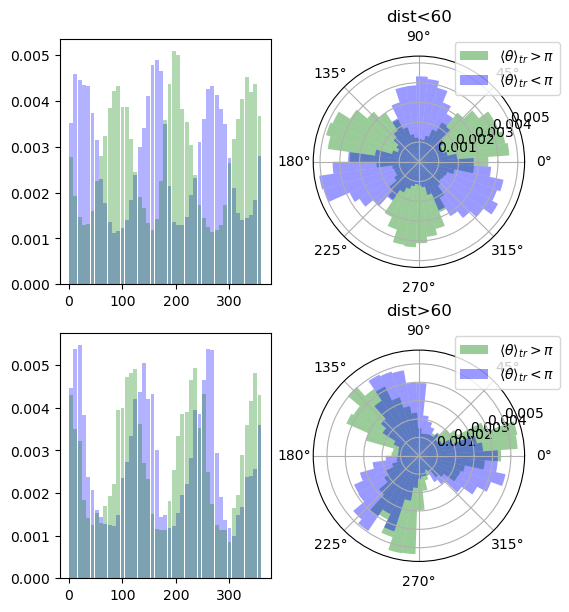

In [11]:
%matplotlib inline
dist = 60

bins_number = 45  # the [0, 360) interval will be subdivided into this
# number of equal bins
bins = np.linspace(0, 2*np.pi, bins_number+1)
width = 2 * np.pi / bins_number

m_ang_up_close, m_ang_down_close = [], []
m_ang_up_far, m_ang_down_far = [], []
for i in range(3):
    m_ang_up_close.append(fuse_df["angm"+str(i+1)+"_rel"][np.logical_and(
        fuse_df["fuse_up"], fuse_df["distance"]<dist)].values)
    m_ang_down_close.append(fuse_df["angm"+str(i+1)+"_rel"][np.logical_and(
        ~fuse_df["fuse_up"], fuse_df["distance"]<dist)].values)
    m_ang_up_far.append(fuse_df["angm"+str(i+1)+"_rel"][np.logical_and(
        fuse_df["fuse_up"], fuse_df["distance"]>dist)].values)
    m_ang_down_far.append(fuse_df["angm"+str(i+1)+"_rel"][np.logical_and(
        ~fuse_df["fuse_up"], fuse_df["distance"]>dist)].values)
    # break
    
m_ang_up_close = np.concatenate(m_ang_up_close) 
m_ang_down_close = np.concatenate(m_ang_down_close) 
m_ang_up_far = np.concatenate(m_ang_up_far) 
m_ang_down_far = np.concatenate(m_ang_down_far) 

fig1 = plt.figure(figsize=(6,7))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222, projection='polar')
ax3 = plt.subplot(223)
ax4 = plt.subplot(224, projection='polar')

# p1,_,_ = ax1.hist((m_ang_up_close % (2/3*np.pi))*180/np.pi, bins*180/np.pi, #one peak
p1,_,_ = ax1.hist((m_ang_up_close % (2*np.pi))*180/np.pi, bins*180/np.pi, #three peaks
                    density=True, rwidth=.9, alpha=.3, color="b")

# p2,_,_ = ax1.hist(360-(-m_ang_down_close % (2/3*np.pi))*180/np.pi, bins*180/np.pi, #one peak
p2,_,_ = ax1.hist((m_ang_down_close % (2*np.pi))*180/np.pi, bins*180/np.pi, #three peaks
                    density=True, rwidth=.9, alpha=.3, color="g")

ax2.bar(bins[:bins_number], p1, color="green", width=width, bottom=0.0, alpha=.4,
                    label=r"$\langle \theta \rangle _{tr} > \pi$")
ax2.bar(bins[:bins_number], p2, color="blue", width=width, bottom=0.0, alpha=.4,
                    label=r"$\langle \theta \rangle _{tr} < \pi$")
ax2.legend(bbox_to_anchor=(1.2, 1.1)); ax2.set_title("dist<%s" % dist)

# p3,_,_ = ax3.hist((m_ang_up_far % (2/3*np.pi))*180/np.pi, bins*180/np.pi, #one peak
p3,_,_ = ax3.hist((m_ang_up_far % (2*np.pi))*180/np.pi, bins*180/np.pi, #three peaks
                    density=True, rwidth=.9, alpha=.3, color="b")

# p4,_,_ = ax3.hist(360-(-m_ang_down_far % (2/3*np.pi))*180/np.pi, bins*180/np.pi, #one peak
p4,_,_ = ax3.hist(m_ang_down_far % (2*np.pi)*180/np.pi, bins*180/np.pi, #three peaks
                    density=True, rwidth=.9, alpha=.3, color="g")

ax4.bar(bins[:bins_number], p3, color="green", width=width, bottom=0.0, alpha=.4,
                    label=r"$\langle \theta \rangle _{tr} > \pi$")
ax4.bar(bins[:bins_number], p4, color="blue", width=width, bottom=0.0, alpha=.4,
                    label=r"$\langle \theta \rangle _{tr} < \pi$")
ax4.legend(bbox_to_anchor=(1.2, 1.1)); ax4.set_title("dist>%s" % dist)


Text(0, 0.5, '$Angle$')

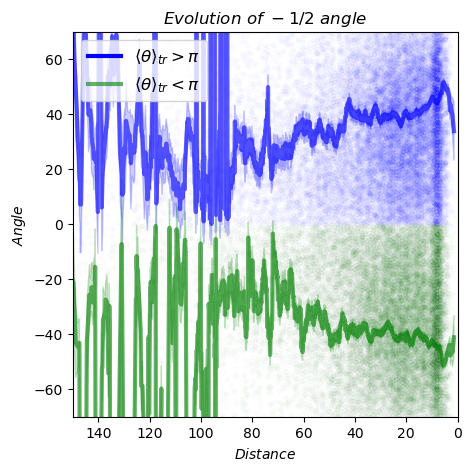

In [7]:
%matplotlib inline                 

df_all = fuse_df
win = 1

fig, ax1 = plt.subplots(1,1,  figsize=(5,5))

for i in range(3):
    y_up = df_all["angm"+str(i+1)+"_rel"][fuse_df["fuse_up"]] % (2/3*np.pi)
    y_down = df_all["angm"+str(i+1)+"_rel"][~fuse_df["fuse_up"]] % (2/3*np.pi)
    ax1.plot(df_all.distance[fuse_df["fuse_up"]], y_up*180/np.pi, ".b", alpha=.01)
    ax1.plot(df_all.distance[~fuse_df["fuse_up"]], -120+(y_down*180/np.pi), ".g", alpha=.01)

m_ang_all = []
for i in range(3):
    m_ang_all.append(fuse_df["angm"+str(i+1)+"_rel"].values)
    # break
    
df_all["angm_rel_all"] = circmean(np.array(m_ang_all) % (2/3*np.pi), axis=0) % (2/3*np.pi)

df = df_all[fuse_df["fuse_up"]]
df_av_up = plot_rolling_average(df, ax1, "angm_rel_all", "distance", win=win, color="b", high=2/3*np.pi)
ax1.plot([0,0],[0,0], "-b", linewidth=3, label=r"$\langle \theta \rangle _{tr} > \pi$")
      

df = df_all[~fuse_df["fuse_up"]]
df_av_down = plot_rolling_average(df, ax1, "angm_rel_all", "distance", show=False, win=win, color="g", high=2/3*np.pi)
# flip to negative values to show divergence
ax1.plot(df_av_down["distance"], -120+df_av_down["angm_rel_all_ave"], "-", color="g", alpha=.6, linewidth=3,
         label=r"$\langle \theta \rangle _{tr} < \pi$")
ax1.fill_between(df_av_down.distance, 
                 (-120+df_av_down["angm_rel_all_ave"])-df_av_down["angm_rel_all_std"]/df_av_down["angm_rel_all_count"]**.5, 
                 (-120+df_av_down["angm_rel_all_ave"])+df_av_down["angm_rel_all_std"]/df_av_down["angm_rel_all_count"]**.5, 
                 color="g", alpha=.2)

plt.xlim([0,150]); 
plt.ylim([-70,70]); 
# plt.yticks(np.arange(-60, 61, 30))
plt.gca().set_box_aspect(1); plt.gca().invert_xaxis()
plt.legend(fontsize=12); plt.title("$Evolution ~of ~-1/2 ~angle$")
plt.xlabel("$Distance$"); plt.ylabel("$Angle$")    

In [ ]:
low,high = 40, 50
np.mean(df_av_down[(df_av_down.distance<high)&(df_av_down.distance>low)]), 25/1000**.5

c:\Users\victo\miniconda3\envs\cellpose\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


(distance                44.655448
 angm_rel_all_ave        81.579440
 angm_rel_all_std        28.002575
 angm_rel_all_count    3210.218633
 dtype: float64,
 0.7905694150420949)

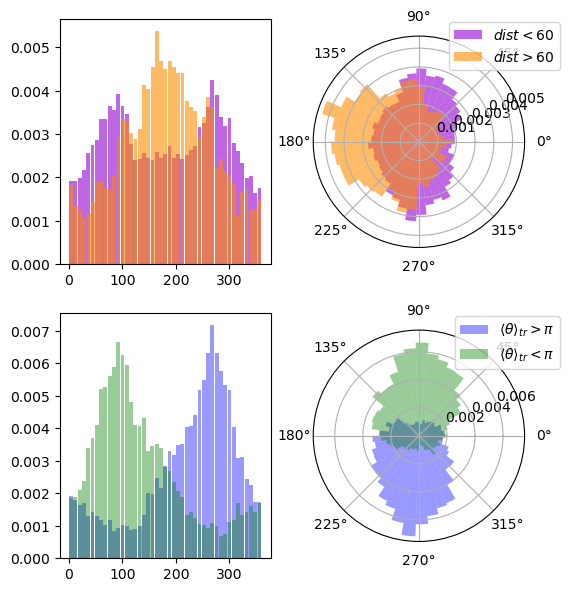

In [10]:
%matplotlib inline
dist = 60
bins_number = 45  # the [0, 360) interval will be subdivided into this
bins = np.linspace(0, 2*np.pi, bins_number+1)
width = 2 * np.pi / bins_number

y = (fuse_df["angp1_rel"]) % (2*np.pi)
y_close = (fuse_df["angp1_rel"][fuse_df["distance"]<dist]) % (2*np.pi)
y_far = (fuse_df["angp1_rel"][fuse_df["distance"]>dist]) % (2*np.pi)
y_up = (fuse_df["angp1_rel"][fuse_df["fuse_up"]]) % (2*np.pi)
y_down = (fuse_df["angp1_rel"][~fuse_df["fuse_up"]]) % (2*np.pi)

plt.figure(figsize=(6,7))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222, projection='polar')
ax3 = plt.subplot(223)
ax4 = plt.subplot(224, projection='polar')

# p = ax1.hist(y, 60, alpha=.3, density=True, rwidth=.9)
p1,_,_ = ax1.hist(y_close*180/np.pi, 45, alpha=.6, density=True, rwidth=.9, color="darkviolet")
p2,_,_ = ax1.hist(y_far*180/np.pi, 45, alpha=.6, density=True, rwidth=.9, color="darkorange")
p3,_,_ = ax3.hist(y_up*180/np.pi, 45, alpha=.4, density=True, rwidth=.9, color="b")
p4,_,_ = ax3.hist(y_down*180/np.pi, 45, alpha=.4, density=True, rwidth=.9, color="g")


ax2.bar(bins[:bins_number], p1, color="darkviolet", width=width, bottom=0., alpha=.6, label="$dist<%s$" %dist)
ax2.bar(bins[:bins_number], p2, color="darkorange", width=width, bottom=0., alpha=.6, label="$dist>%s$" %dist)
ax4.bar(bins[:bins_number], p3, color="b", width=width, bottom=0., alpha=.4, label=r"$\langle \theta \rangle _{tr} > \pi$")
ax4.bar(bins[:bins_number], p4, color="g", width=width, bottom=0., alpha=.4, label=r"$\langle \theta \rangle _{tr} < \pi$")
ax2.legend(bbox_to_anchor=(1.2, 1.1)); ax4.legend(bbox_to_anchor=(1.2, 1.1))

Text(0, 0.5, '$Angle$')

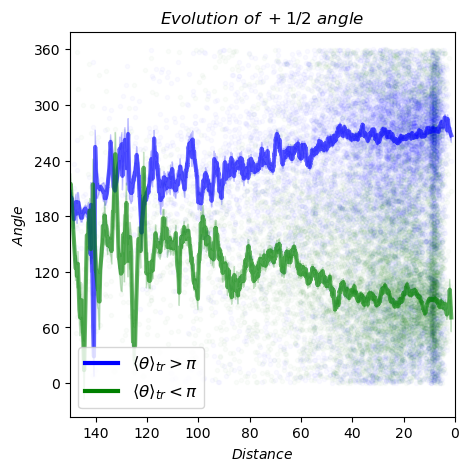

In [14]:
%matplotlib inline

df_all = fuse_df #create_df# 

fig, ax1 = plt.subplots(1,1,  figsize=(5,5))
ax1.plot(df_all.distance[fuse_df["fuse_up"]], df_all.angp1_rel[fuse_df["fuse_up"]]*180/np.pi, ".b", alpha=.02)
ax1.plot(df_all.distance[~fuse_df["fuse_up"]], df_all.angp1_rel[~fuse_df["fuse_up"]]*180/np.pi, ".g", alpha=.02)


win = 1

df = df_all[fuse_df["fuse_up"]]
df_av_up = plot_rolling_average(df, ax1, "angp1_rel", "distance", win=win, color="b")
df = df_all[~fuse_df["fuse_up"]]
df_av_down = plot_rolling_average(df, ax1, "angp1_rel", "distance", win=win, color="g")
ax1.plot([0,0],[0,0], "-b", linewidth=3, label=r"$\langle \theta \rangle _{tr} > \pi$")
ax1.plot([0,0],[0,0], "-g", linewidth=3, label=r"$\langle \theta \rangle _{tr} < \pi$")


plt.xlim([0,150]); 
# plt.ylim([0,360]); 
plt.yticks(np.arange(0, 361, 60))
plt.gca().set_box_aspect(1); plt.gca().invert_xaxis()
plt.legend(fontsize=12); plt.title("$Evolution ~of ~+1/2 ~angle$")
plt.xlabel("$Distance$"); plt.ylabel("$Angle$")

## Relative angle between defects in a pair

Text(0.5, 1.0, '$Relative ~angle ~btw ~-1/2 ~and ~+1/2 ~defects$')

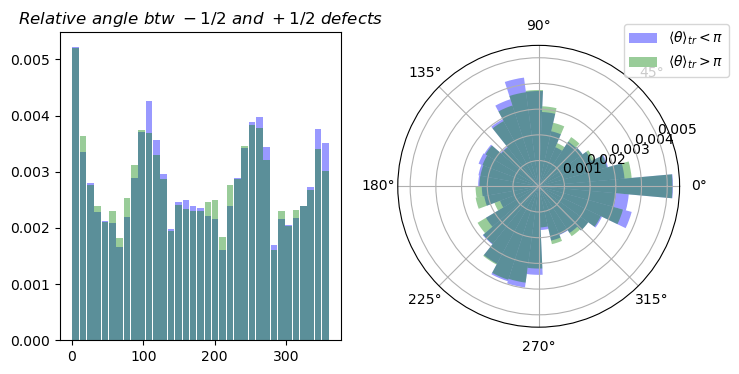

In [15]:
fig1 = plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection='polar')
bins_number = 35  # the [0, 360) interval will be subdivided into this
bins = np.linspace(0, 2*np.pi, bins_number+1) #* 180/np.pi
width = 2 * np.pi / bins_number

m_ang_all = []
for i in range(3):
    fuse_df["mp_angle"+str(i+1)]  = (fuse_df["angm"+str(i+1)] - fuse_df.angp1) % (2*np.pi)

mp_ang = []
mp_ang_up = []
mp_ang_down = []
for i in range(3):
    mp_ang.append(fuse_df["mp_angle"+str(i+1)].values)
    mp_ang_up.append(fuse_df["mp_angle"+str(i+1)][fuse_df.fuse_up].values)
    mp_ang_down.append(fuse_df["mp_angle"+str(i+1)][~fuse_df.fuse_up].values)   

mp_ang_up = np.array(mp_ang_up)
mp_ang_down = np.array(mp_ang_down)
fuse_df["mp_angle_av"]= circmean(mp_ang, axis=0, low=0, high=2/3*np.pi)

p1,_,_ = ax1.hist(mp_ang_up.ravel() *180/np.pi, bins*180/np.pi, # 3 peaks
# p1,_,_ = ax1.hist(fuse_df["mp_angle_av"][fuse_df.fuse_up] *180/np.pi, bins*180/np.pi, # one peak
    alpha=.4, rwidth=.9, density=True, color="b")# ,  df.shape  
ax2.bar(bins[:bins_number], p1, color="b", width=width, bottom=0.0, alpha=.4,
    label=r"$\langle \theta \rangle _{tr} < \pi$")

p2,_,_ = ax1.hist(mp_ang_down.ravel() *180/np.pi, bins*180/np.pi, # 3 peaks
# p2,_,_ = ax1.hist(fuse_df["mp_angle_av"][~fuse_df.fuse_up] *180/np.pi, bins*180/np.pi, # one peak
    alpha=.4, rwidth=.9, density=True, color="g")# ,  df.shape  
ax2.bar(bins[:bins_number], p2, color="g", width=width, bottom=0.0, alpha=.4,
    label=r"$\langle \theta \rangle _{tr} > \pi$")

ax2.legend(bbox_to_anchor=(1.2, 1.1)); ax1.set_title(r"$Relative ~angle ~btw ~-1/2 ~and ~+1/2 ~defects$")

Text(0, 0.5, '$Angle ~(deg)$')

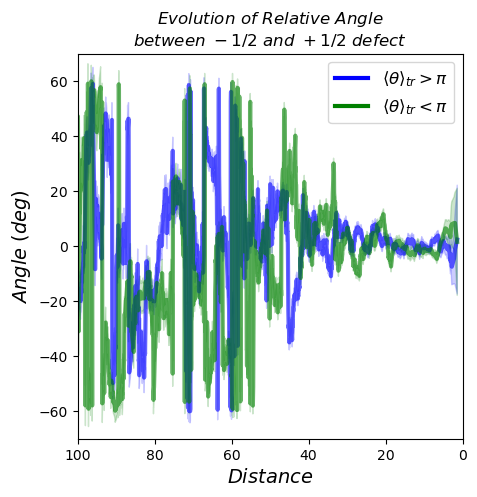

In [16]:
fig, ax1 = plt.subplots(1,1,  figsize=(5,5))

win = 1
# for i in range(3):
    # df_av_up = plot_rolling_average(fuse_df[fuse_df.fuse_up], ax1, "mp_angle"+str(i+1), "distance", win=win, color="b", low=-2/3*np.pi, high=0)
    # df_av_up = plot_rolling_average(fuse_df[~fuse_df.fuse_up], ax1, "mp_angle"+str(i+1), "distance", win=win, color="g", low=0*np.pi, high=2/3*np.pi)


# ax1.plot(df_all.distance[fuse_df.fuse_up], (df_all.mp_angle_av[fuse_df.fuse_up] % (2/3*np.pi) - (1/3*np.pi))*180/np.pi, "ob", alpha=.05)
# ax1.plot(df_all.distance[~fuse_df.fuse_up], (df_all.mp_angle_av[~fuse_df.fuse_up] % (2/3*np.pi) - (1/3*np.pi))*180/np.pi, "og", alpha=.05)

df_av_up = plot_rolling_average(fuse_df[fuse_df.fuse_up], ax1, "mp_angle_av", "distance", win=win, color="b", low=-1/3*np.pi, high=1/3*np.pi)
df_av_up = plot_rolling_average(fuse_df[~fuse_df.fuse_up], ax1, "mp_angle_av", "distance", win=win, color="g", low=-1/3*np.pi, high=1/3*np.pi)

ax1.plot([0,0],[0,0], "-b", linewidth=3, label=r"$\langle \theta \rangle _{tr} > \pi$")
ax1.plot([0,0],[0,0], "-g", linewidth=3, label=r"$\langle \theta \rangle _{tr} < \pi$")


plt.xlim([100,0]); plt.ylim([-70, 70]); #plt.yticks(np.arange(0, 121, 30))
plt.gca().set_box_aspect(1); #plt.gca().invert_xaxis()  
plt.legend(fontsize=12); 
plt.title(r"$Evolution ~of ~Relative ~Angle$" +"\n" + r"$between ~-1/2 ~and ~+1/2 ~defect$")
plt.xlabel(r"$Distance$", fontsize=14); plt.ylabel(r"$Angle ~(deg)$", fontsize=14)    

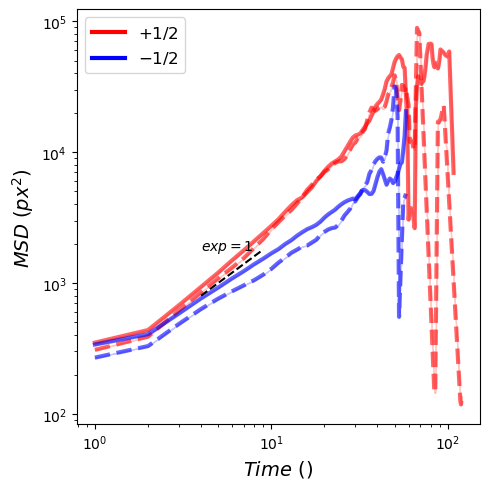

In [129]:
min_dist, max_dist = 40, 40
min_track = 1

# msd_plus_df_far = msd_from_df(all_pairs_df[~all_pairs_df.fusion].reset_index(),"xp","yp","FRAME","plus_id",minimal_track=min_track)
# msd_minus_df_far = msd_from_df(all_pairs_df[~all_pairs_df.fusion].reset_index(),"xm","ym","FRAME","min_id",minimal_track=min_track)

# df = all_pairs_df[all_pairs_df.fusion]
# msd_plus_df_far = msd_from_df(df[df.distance>min_dist].reset_index(),"xp","yp","FRAME","plus_id",minimal_track=min_track)
# msd_minus_df_far = msd_from_df(df[df.distance>min_dist].reset_index(),"xm","ym","FRAME","min_id",minimal_track=min_track)
# msd_plus_df_close = msd_from_df(df[df.distance<max_dist].reset_index(),"xp","yp","FRAME","plus_id",minimal_track=min_track)
# msd_minus_df_close= msd_from_df(df[df.distance<max_dist].reset_index(),"xm","ym","FRAME","min_id",minimal_track=min_track)
# dfs = [msd_plus_df_far, msd_minus_df_far, msd_plus_df_close, msd_minus_df_close]

df = all_pairs_df[all_pairs_df.fusion]
plus_fuse = msd_from_df(df.reset_index(),"xp","yp","FRAME","plus_id",minimal_track=min_track)
minus_fuse = msd_from_df(df.reset_index(),"xm","ym","FRAME","min_id",minimal_track=min_track)

df = all_pairs_df[~all_pairs_df.fusion]
plus_cr = msd_from_df(df.reset_index(),"xp","yp","FRAME","plus_id",minimal_track=min_track)
minus_cr = msd_from_df(df.reset_index(),"xm","ym","FRAME","min_id",minimal_track=min_track)
dfs = [plus_fuse, minus_fuse, plus_cr, minus_cr]


%matplotlib inline
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
# msd_plus_df.plot.scatter("FRAME", "MSD", logx=True, logy=True, ax=ax1, c="b", alpha=.05)
# msd_minus_df.plot.scatter("FRAME", "MSD", logx=True, logy=True, ax=ax1, c="g", alpha=.05)

win = 1

colors = ["--r","--b", "-r", "-b"]

for msd_df,color in zip(dfs, colors):
    msd_df = msd_df.sort_values(by="FRAME")
    msd_df["ave"] = roll_func(msd_df.MSD, msd_df.FRAME, win, func=np.mean)
    msd_df["std"] = roll_func(msd_df.MSD, msd_df.FRAME, win, func=np.std)
    msd_df["count"] = roll_func(msd_df.MSD, msd_df.FRAME, win, np.sum)

    ax1.plot(msd_df.FRAME, msd_df["ave"], color, alpha=.6, linewidth=3)
    ax1.fill_between(msd_df.FRAME, 
                    msd_df["ave"]-msd_df["std"]/msd_df["count"]**.5, 
                    msd_df["ave"]+msd_df["std"]/msd_df["count"]**.5, 
                    color=''.join(x for x in color if x.isalpha()), alpha=.2) 


ax1.plot([0,0],[0,0], "-", color="r", linewidth=3, label=r"$+1/2$")
ax1.plot([0,0],[0,0], "-", color="b", linewidth=3, label=r"$-1/2$")
xref = np.arange(4, 10, 1)
ax1.plot(xref, 2e2*xref**1,"--k")
ax1.text(xref[0], 2e2*xref[-1]**1, r"$exp=1$")
ax1.set_xscale('log'); ax1.set_yscale('log')
ax1.set_xlabel(r"$Time ~()$", fontsize=14); ax1.set_ylabel(r"$MSD ~(px^2)$", fontsize=14)
plt.legend(loc='upper left', fontsize=12); plt.tight_layout()


(6.193274201313899, 6.2243979037380734)

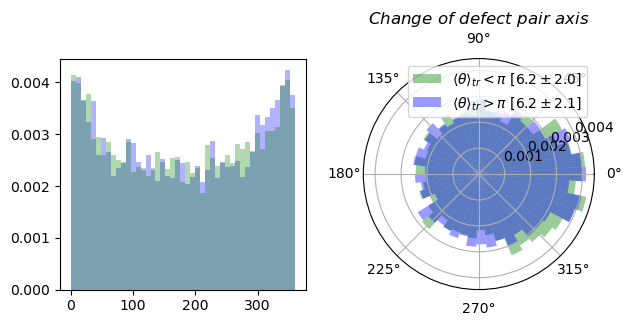

In [130]:
%matplotlib inline
diff_period = 5
dist = 30
bins_number = 45  # the [0, 360) interval will be subdivided into this
# number of equal bins
bins = np.linspace(0, 2*np.pi, bins_number+1)
width = 2 * np.pi / bins_number

# (df_all["mp_angle"][(df_all.fuse_up) & (df_all.distance<40)].diff() % 2*np.pi).hist(alpha=.6)
# (df_all["mp_angle"][~(df_all.fuse_up) & (df_all.distance<40)].diff() % 2*np.pi).hist(alpha=.6)

dtheta_up = df_all["mp_angle"][(df_all.fuse_up) & (df_all.distance<dist)].diff(periods=diff_period).dropna() % (2*np.pi)
dtheta_down = df_all["mp_angle"][(~df_all.fuse_up) & (df_all.distance<dist)].diff(periods=diff_period).dropna() % (2*np.pi)

fig1 = plt.figure(figsize=(7,3))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection='polar')

p1,_,_ = ax1.hist(dtheta_up*180/np.pi, bins*180/np.pi, #three peaks
                    density=True, rwidth=1., alpha=.3, color="b")
p2,_,_ = ax1.hist(dtheta_down*180/np.pi, bins*180/np.pi, #three peaks
                    density=True, rwidth=1., alpha=.3, color="g")

ax2.bar(bins[:bins_number], p1, color="green", width=width, bottom=0.0, alpha=.4,
        label=r"$\langle \theta \rangle _{tr} < \pi ~[%.1f  \pm%.1f]$" 
        %(circmean(dtheta_up), circstd(dtheta_up)))
ax2.bar(bins[:bins_number], p2, color="blue", width=width, bottom=0.0, alpha=.4,
        label=r"$\langle \theta \rangle _{tr} > \pi ~[%.1f  \pm%.1f]$" 
        %(circmean(dtheta_down), circstd(dtheta_down)))

ax2.legend(loc='upper right')
ax2.set_title(r"$Change ~of ~defect ~pair ~axis$")

circmean(dtheta_down, low=0, high=2*np.pi), circmean(dtheta_up, low=0, high=2*np.pi)

Text(0, 0.5, '$\\Delta \\theta, ~Angle ~change ~(deg)$')

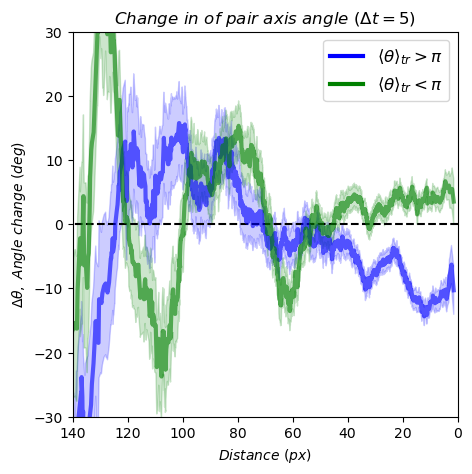

In [132]:
%matplotlib inline
win = 5
df = df_all.copy().set_index("distance")

dtheta_up = df["mp_angle"][df.fuse_up].diff(periods=diff_period).dropna()# % (2*np.pi)
dtheta_up = dtheta_up.reset_index()
dtheta_down = df["mp_angle"][~df.fuse_up].diff(periods=diff_period).dropna()
dtheta_down = dtheta_down.reset_index()

fig, ax1 = plt.subplots(1,1,  figsize=(5,5))
ax1.plot([0,160], [0,0], "--k", alpha=1)
# ax1.plot(dtheta_up.distance, (dtheta_up.mp_angle)*180/np.pi, "ob", alpha=.05)
# ax1.plot(dtheta_down.distance, (dtheta_down.mp_angle)*180/np.pi, "og", alpha=.05)

ax1.plot([0,0],[0,0], "-b", linewidth=3, label=r"$\langle \theta \rangle _{tr} > \pi$")
ax1.plot([0,0],[0,0], "-g", linewidth=3, label=r"$\langle \theta \rangle _{tr} < \pi$")

df_av_up = plot_rolling_average(dtheta_up, ax1, "mp_angle", "distance", win=win, color="b", low=-np.pi, high=np.pi)
df_av_down = plot_rolling_average(dtheta_down, ax1, "mp_angle", "distance", win=win, color="g", low=-np.pi, high=np.pi)

# ax1.invert_xaxis()
ylim = 30
ax1.set_box_aspect(1) 
ax1.set_ylim([-ylim,ylim])
ax1.set_xlim([140,0])
plt.legend(fontsize=12); plt.title(r"$Change ~in ~of ~pair ~axis ~angle ~(\Delta t=%s)$" % diff_period)
plt.xlabel("$Distance ~(px)$"); plt.ylabel(r"$\Delta \theta, ~Angle ~change ~(deg)$")

In [ ]:
min_dist, max_dist = 20, 70
print("average angle change: \n UP=%.2f | DOWN=%.2f" % (
    df_av_up.mp_angle_ave[(df_av_up.distance<max_dist)&(df_av_up.distance>min_dist)].mean(),
    df_av_down.mp_angle_ave[(df_av_down.distance<max_dist)&(df_av_down.distance>min_dist)].mean()
    ))

average angle change: 
 UP=-2.12 | DOWN=1.09


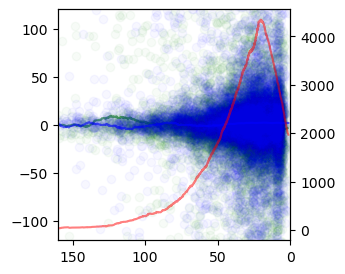

In [ ]:
fig, ax1 = plt.subplots(figsize=(3,3))

df = dtheta_up.sort_values(by="distance")
mean = roll_func(df.mp_angle, df.distance,
          15, circmean, low=-np.pi, high=np.pi)*180/np.pi
ax1.plot(df.distance, df.mp_angle*180/np.pi, "og", alpha=.03)
ax1.plot(df.distance, mean, "-g", alpha=.6)

df = dtheta_down.sort_values(by="distance")
mean = roll_func(df.mp_angle, df.distance,
          15, circmean, low=-np.pi, high=np.pi)*180/np.pi
ax1.plot(df.distance, df.mp_angle*180/np.pi, "ob", alpha=.03)
ax1.plot(df.distance, mean, "-b", alpha=.6)
ax1.set_ylim([-120,120]); ax1.set_xlim([160,0])

num_of_samples = roll_func(1*df.mp_angle.abs(), df.distance,
          15, np.sum)
ax2 = ax1.twinx()
ax2.plot(df.distance, num_of_samples, "-r", alpha=.5)

# df_av_down = plot_rolling_average(df, ax1, "angm_rel_all", "distance", show=False, win=win, color="g", high=2/3*np.pi)
# # flip to negative values to show divergence
# ax1.plot(df_av_down["distance"], -120+df_av_down["angm_rel_all_ave"], "-", color="g", alpha=.6, linewidth=3,
#          label=r"$\langle \theta \rangle _{tr} < \pi$")
# ax1.fill_between(df_av_down.distance, 
#                  (-120+df_av_down["angm_rel_all_ave"])-df_av_down["angm_rel_all_std"], 
#                  (-120+df_av_down["angm_rel_all_ave"])+df_av_down["angm_rel_all_std"], 
#                  color="g", alpha=.2)


### Compare defect velocity (creation-fusion)

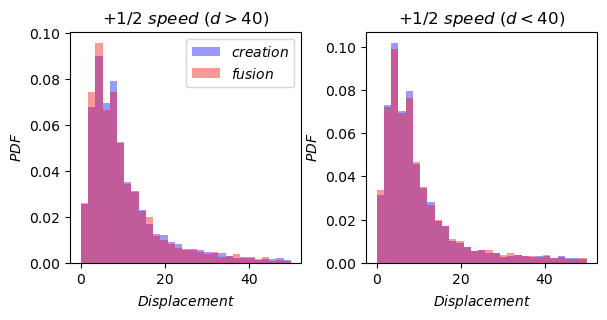

In [133]:
# create_df.shape, create_df.diff().shape
bins = np.linspace(0, 50, 30)

cr_df = create_df.reset_index()
cr_df["p_speed"] = (cr_df["xp"].diff()**2 + cr_df["yp"].diff()**2)**.5 / cr_df["FRAME"].diff()
cr_df = cr_df.dropna()

f_df = fuse_df.reset_index()
f_df["p_speed"] = (f_df["xp"].diff()**2 + f_df["yp"].diff()**2)**.5 / f_df["FRAME"].diff()
f_df = f_df.dropna()

fig, (ax1,ax2) = plt.subplots(1,2,  figsize=(7,3))

ax1.hist(cr_df["p_speed"][cr_df["distance"]>40], density=True, bins=bins, alpha=.4, color="b",
label=r"$creation$")
ax1.hist(f_df["p_speed"][f_df["distance"]>40], density=True, bins=bins, alpha=.4, color="r",
label=r"$fusion$")    

ax2.hist(cr_df["p_speed"][cr_df["distance"]<40], density=True, bins=bins, alpha=.4, color="b")
ax2.hist(f_df["p_speed"][f_df["distance"]<40], density=True, bins=bins, alpha=.4, color="r")

ax1.set_box_aspect(1); ax1.set_title(r"$+1/2 ~speed ~(d>40)$")
ax1.set_xlabel(r"$Displacement$"); ax1.set_ylabel(r"$PDF$")
ax2.set_box_aspect(1); ax2.set_title(r"$+1/2 ~speed  ~(d<40)$")
ax2.set_xlabel(r"$Displacement$"); ax2.set_ylabel(r"$PDF$")
ax1.legend(loc='upper right')

In [134]:
# FUSION
mp_distance_fusion_mat = np.zeros([len(mp_distance_fusion), len(max(mp_distance_fusion, key = lambda x: len(x)))])
mp_distance_fusion_mat[:] = np.nan
for i, dist in enumerate(mp_distance_fusion):
    # plt.plot(np.arange(len(dist)), np.flip(dist), alpha=.2)  
    mp_distance_fusion_mat[i,0:len(dist)] = np.flip(dist)

# CREATION
mp_distance_creation_mat = np.zeros([len(mp_distance_creation), len(max(mp_distance_creation, key = lambda x: len(x)))])
mp_distance_creation_mat[:] = np.nan
for i, dist in enumerate(mp_distance_creation):  
    # plt.plot(np.arange(len(dist)), dist, alpha=.2) 
    # plt.scatter(np.arange(len(dist)), dist, c=np.arange(len(dist)), s=5, alpha=.2, cmap="plasma")     
    mp_distance_creation_mat[i,0:len(dist)] = dist  

mean_fusion, stdiv_fusion = np.flip(np.nanmean(mp_distance_fusion_mat, axis=0)), np.flip(np.nanstd(mp_distance_fusion_mat, axis=0))
mean_creation, stdiv_creation = np.nanmean(mp_distance_creation_mat, axis=0), np.nanstd(mp_distance_creation_mat, axis=0)     

## Fit fusion-creation mean trajectories

FUSION
slope: -2.609522853636068 | intercept: 16.54172346176278
Y=0 @ X=: 6.338983940575114
CREATION
slope: 2.8296077728785445 | intercept: 21.06892151188477
Y=0 @ X=: -7.445880561195756


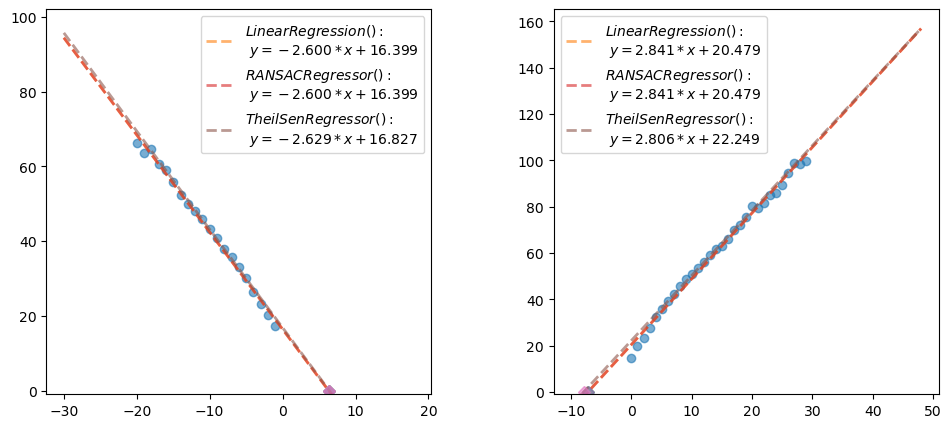

In [170]:
%matplotlib inline
from sklearn import linear_model

means = {"fusion": mean_fusion[-20:], "creation": mean_creation[:30]}
fig, axs = plt.subplots(1,2,  figsize=(12,5))
axs = axs.ravel()

lrs = (
    linear_model.LinearRegression(), 
    linear_model.RANSACRegressor(), 
    linear_model.TheilSenRegressor()
    )

slope_intercept = {}

for ax, (name, mean) in zip(axs, means.items()):
    
    ave_slope, ave_intercept = 0, 0
    y = mean
    X = np.arange(len(mean))

    if name=="fusion":
        X = X - y.shape[0]

    ax.plot(X, y, "o", alpha=.6)

    for lr in lrs:
        lr.fit(X.reshape(-1, 1), y)
        try:
            slope = lr.estimator_.coef_[0]
            intercept = lr.estimator_.intercept_
        except:
            slope = lr.coef_[0]
            intercept = lr.intercept_

        # prdict for line
        line_X = np.arange(X.min()-10, X.max()+20)[:, np.newaxis]
        line_y = lr.predict(line_X)

        ax.plot(line_X, line_y, "--", linewidth=2, alpha=.6,
                label="$%s:$\n $y= %.3f *x + %.3f$" %(lr, slope, intercept))   
        ax.plot(-intercept/slope, 0, "D", alpha=.6,)        
        ave_slope += slope  
        ave_intercept += intercept

    # use prints to set the SLOPE and INTERCEP globals in the next cell
    print(name.upper())
    print('slope:', ave_slope/len(lrs), '| intercept:', ave_intercept/len(lrs))
    print('Y=0 @ X=:', -ave_intercept/ave_slope)
    slope_intercept[name] = {"slope": ave_slope/len(lrs), "intercept": ave_intercept/len(lrs)}


    ax.set_box_aspect(1)
    ax.set_ylim([-1,None])

    ax.legend(loc='upper left')
    if name=="fusion":
        ax.legend(loc='upper right')
    # break

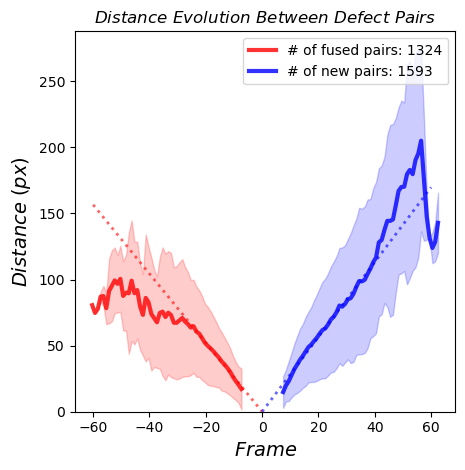

In [171]:
%matplotlib inline
SAVE = False
# FUSION
slope_fusion, intercept_fusion = slope_intercept["fusion"]["slope"], slope_intercept["fusion"]["intercept"] #-2.0 , 23.72
fusion_tshift = intercept_fusion/slope_fusion
# mean_fusion, stdiv = np.flip(np.nanmean(mp_distance_fusion_mat, axis=0)), np.flip(np.nanstd(mp_distance_fusion_mat, axis=0))
time_fusion = np.arange(len(mean_fusion)) - len(mean_fusion) + fusion_tshift

# uncomment to plot in same direction 
# mean, stdiv = np.nanmean(mp_distance_fusion_mat, axis=0), np.nanstd(mp_distance_fusion_mat, axis=0)
# max_frame = 0

plt.plot(time_fusion, mean_fusion, "r-", alpha=.8, linewidth=3,
    label="# of fused pairs: %s" % (mp_distance_fusion_mat.shape[0]))
plt.fill_between(time_fusion, mean_fusion-stdiv_fusion, mean_fusion+stdiv_fusion, color="red", alpha=.2)
xfit = np.array([-60,0])
plt.plot(xfit, slope_fusion * xfit, linestyle="dotted", color="red", alpha=.6, linewidth=2)

# CREATION
slope_creation, intercept_creation =  slope_intercept["creation"]["slope"], slope_intercept["creation"]["intercept"]#2.98, 27.25
creation_tshift = - intercept_creation/slope_creation
# mean_creation, stdiv = np.nanmean(mp_distance_creation_mat, axis=0), np.nanstd(mp_distance_creation_mat, axis=0)
time_creation = np.arange(len(mean_creation)) - creation_tshift

plt.plot(time_creation, mean_creation, "b-", alpha=.8, linewidth=3,
    label="# of new pairs: %s" % (mp_distance_creation_mat.shape[0]))
plt.fill_between(time_creation, mean_creation-stdiv_creation, mean_creation+stdiv_creation, color="b", alpha=.2)
xfit = np.array([0,60])
plt.plot(xfit, slope_creation * xfit, linestyle="dotted", color="b", alpha=.6, linewidth=2,
    )

plt.ylim([0,None])
lim = 60
# plt.xlim([-lim,lim])
plt.gca().set_box_aspect(1)  
plt.xlabel(r'$Frame$', fontsize=14)
plt.ylabel(r'$Distance ~(px)$', fontsize=14) #plt.ylabel('$Distance ~(\mu m)$')
plt.title(r'$Distance ~Evolution ~Between ~Defect ~Pairs$')
plt.tight_layout()
plt.legend()

if SAVE:
    plt.savefig(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps\Defects\Images/defect_pair_distance.png")
 

In [143]:
def cofidence_range(X,y):
    import statsmodels.api as sm
    alpha = 0.05 # 95% confidence interval
    lr = sm.OLS(y, sm.add_constant(X)).fit()
    conf_interval = lr.conf_int(alpha)
    print("slope 95% CI ", "[%.2f, %.2f]" % (conf_interval[1][0], conf_interval[1][1]))    


for name, mean in means.items():
    y = mean
    X = np.arange(len(mean))
    print(name.upper())
    cofidence_range(X,y)

# Output of conf_interval
#  lower upper
# [-1.234 0.765]
# [-0.345 0.154]
# This means that we are 95% confident that the true value of the first parameter is between -1.234 and 0.765, 
# and we are 95% confident that the true value of the second parameter is between -0.345 and 0.154.

FUSION
slope 95% CI  [-2.70, -2.50]
CREATION
slope 95% CI  [2.75, 2.93]


## Flow Averaging Around Defects

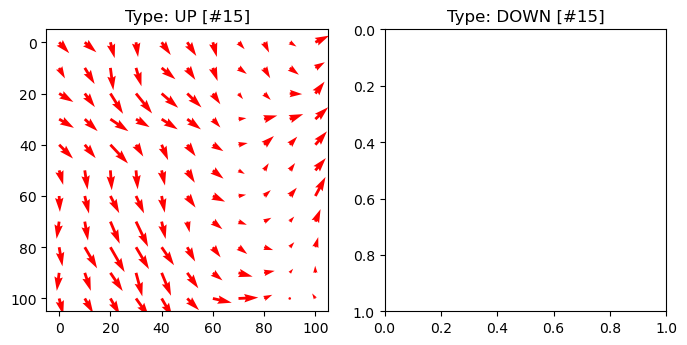

In [ ]:
%matplotlib inline

from scipy.ndimage import rotate, gaussian_filter

def crop(img, center, width, height):
    ulx, uly = max(int(center[0] - width//2), 0), max(int(center[1] - height//2), 0)
    lrx, lry = min(int(center[0] + width//2), img.shape[1]), min(int(center[1] + height//2), img.shape[0])
    new_center = ((lrx-ulx)/2 , (lry-uly)/2)
    return img[uly:lry,ulx:lrx], new_center

def rotate_vector(vector, angle):
    '''rotate vectors'''
    x = vector[0] * np.cos(angle) - vector[1] * -np.sin(angle)
    y = vector[0] * -np.sin(angle) + vector[1] * np.cos(angle)
    return [x, y]    

def rotate_flow_field(flow, angle):
    '''rotate flow field'''
    uv_rot = rotate_vector(flow, angle)
    u = rotate(uv_rot[0], angle * 180/np.pi)
    v = rotate(uv_rot[1], angle * 180/np.pi)
    return [u, v]  

def defect_flow_frame_average(img1,img2, df_frame, defect_type="up", box=(150,150), filt=1):
    width, height = box[0], box[1]
    width1, height1 = int(width/2**.5), int(height/2**.5)
    flow = cv2.calcOpticalFlowFarneback(img1,img2, None, 0.5, 3, 
        winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, flags=0)
    flow = gaussian_filter(flow, sigma=filt)

    if defect_type=="up":
        df = df_frame[df_frame.fuse_up].copy()
    elif defect_type=="down":
        df = df_frame[~df_frame.fuse_up].copy()
    else:
        df = df_frame.copy()


    u_frame = np.zeros((height1, width1), dtype=np.float32)
    v_frame = u_frame
    count = 0

    for i in range(len(df["xp"])):
        try:
            # center at defect position
            cnt = (int(df["xp"].iloc[i]), int(df["yp"].iloc[i]))
            #1 crop each component of velocity field
            
            # image_crop = crop(255-img_clahe, cnt, width, height)[0] *** image
            u,_ = crop(flow[:,:,0], cnt, width, height)
            v,_ = crop(flow[:,:,1], cnt, width, height)

            #2 rotate velocity field (1. rotate vectors 2. rotate positions) 
            # image_rot = rotate(image_crop, df["angp1"].iloc[i] * 180/np.pi) *** image
            uv_rot = rotate_flow_field((u,v), df["angp1"].iloc[i])

            #3 crop again to smaller box (box**0.5)
            cnt_crop = uv_rot[0].shape[1]/2, uv_rot[0].shape[0]/2
            # image_rot_crop = crop(image_rot, cnt_crop, width1, height1)[0] *** image
            u_frame = u_frame + crop(uv_rot[0], cnt_crop, width1, height1)[0]
            v_frame = v_frame + crop(uv_rot[1], cnt_crop, width1, height1)[0]
            count += 1 
        except:
            pass
        #      break

    if count:
        return u_frame/count, v_frame/count, count

image_list = glob.glob(r"C:\Users\victo\OneDrive - BGU\BEER\B-sub-sur-minus-in-supernatant-40X-100fps\*.tif")
image_list = natsorted(image_list, key=lambda y: y.lower())

frame = 51
img1 = cv2.imread(image_list[frame])[:,900:,0]
img2 = cv2.imread(image_list[frame+1])[:,900:,0] 
# df_frame = all_pairs_df[all_pairs_df.index == frame]
df_frame = all_pairs_df[all_pairs_df.index == frame]

u_up, v_up, count_up = defect_flow_frame_average(img1,img2, df_frame, defect_type="all")
# u_dwn, v_dwn, up_dwn = defect_flow_frame_average(img1,img2, df_frame, defect_type="down")
y, x = np.mgrid[0:u_up.shape[0], 0:u_up.shape[1]] 

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
step = 10
ax1.quiver(x[::step, ::step], y[::step, ::step], 
          u_up[::step, ::step], -v_up[::step, ::step],  color='r',
          width=.01, scale=10,)
ax1.set_title("Type: %1s [#%1d]" % ("UP", count_up))
ax1.set_box_aspect(1) ; ax1.invert_yaxis()

# ax2.quiver(x[::step, ::step], y[::step, ::step], 
#           u_dwn[::step, ::step], -v_dwn[::step, ::step],  color='b',
#           width=.01, scale=10,)
# ax2.set_title(r"$\langle v \rangle _x =%.2f ~;~ \langle v \rangle _y =%.2f$" % (u_frame.mean(), v_frame.mean()))
ax2.set_title("Type: %1s [#%1d]" % ("DOWN", count_up))
ax2.set_box_aspect(1) ; ax2.invert_yaxis()


In [ ]:
all_pairs_df[all_pairs_df.index == 51]

plus_id      xp     yp     angp1  min_id      xm     ym     angm1  \
FRAME                                                                      
51       292.0  1304.0  759.0 -2.324779   206.0  1157.0  684.0 -0.691150   
51       630.0  1556.0   45.0 -2.827433   230.0  1591.0  161.0 -0.628319   
51       527.0  1098.0  665.0  0.125664   350.0  1096.0  631.0 -2.387610   
51       641.0   525.0  463.0 -2.324779   353.0   534.0  510.0  3.078761   
51       447.0  1202.0  814.0 -2.450442   407.0  1196.0  807.0 -1.068142   
51       497.0   655.0  522.0 -1.633628   418.0   651.0  492.0  3.078761   
51       110.0   206.0  278.0  2.576106   474.0   179.0  289.0  2.010619   
51       533.0   728.0  600.0  1.696460   502.0   732.0  595.0  1.068142   
51       365.0  1717.0  534.0 -2.890265   504.0  1749.0  557.0  2.827433   
51       501.0   462.0  509.0 -1.884956   507.0   446.0  520.0 -0.125664   
51       380.0   843.0  435.0  2.953097   508.0   844.0  560.0 -1.884956   
51       571.0   914.0  746.0 -0.188496   538.0   942.0  769.0 -0.753982   
51       547.0   129.0  182.0 -0.376991   580.0   192.0  181.0  3.015929   
51       442.0  1047.0   18.0  1.319469   582.0  1040.0   16.0  1.696460   
51       582.0   386.0  261.0  0.502655   598.0   382.0  270.0  0.251327   
51       584.0   338.0  249.0 -1.696460   600.0   329.0  248.0 -2.450442   
51       585.0  1436.0  212.0 -0.062832   602.0  1366.0  237.0  2.010619   
51       626.0   185.0  836.0  0.816814   609.0   185.0  810.0 -1.884956   
51       494.0   791.0  672.0 -3.141593   612.0   784.0  669.0 -1.319469   
51       603.0   337.0  432.0  1.507964   615.0   341.0  423.0  0.753982   
51       612.0   858.0  172.0  2.387610   627.0   857.0  164.0  2.324779   
51       616.0  1102.0   77.0  2.701770   628.0  1068.0   51.0  0.314159   
51       593.0  1162.0  649.0 -1.696460   635.0  1142.0  610.0 -0.502655   
51       598.0  1674.0  530.0  2.010619   636.0  1678.0  544.0  0.125664   
51       607.0  1301.0  368.0 -0.251327   641.0  1279.0  376.0  2.199115   
51       633.0  1777.0  854.0  2.638938   649.0  1787.0  843.0  1.382301   
51       639.0   627.0  507.0  1.193805   657.0   611.0  496.0 -1.068142   
51       604.0   705.0  431.0  0.188496   661.0   725.0  408.0  2.199115   
51       340.0  1243.0  307.0  1.319469   669.0  1246.0  301.0  0.942478   
51       631.0  1094.0   23.0  1.696460   685.0  1082.0   22.0  1.633628   
51       618.0  1340.0   43.0  1.947787   765.0  1328.0   38.0 -2.073451   

          angm2     angm3    distance  mp_angle  fusion  
FRAME                                                    
51    -2.764602  1.570796  165.027270  3.613370   False  
51     1.382301 -2.827433  121.165177  1.277759    True  
51    -0.376991  1.633628   34.058773  4.653633    True  
51     1.005310 -1.068142   47.853944  1.381597    True  
51    -3.015929  1.193805    9.219544  4.003763   False  
51     1.382301 -0.942478   30.265492  4.579837   False  
51    -0.251327 -2.513274   29.154759  2.754717    True  
51    -0.942478  1.193805    6.403124  5.387130   False  
51    -1.633628  0.376991   39.408121  0.623199   False  
51    -1.759292  2.576106   19.416488  2.539305    True  
51     2.513274  2.638938  125.004000  1.562796   False  
51     1.319469 -2.764602   36.235342  0.687671   False  
51     0.879646 -1.068142   63.007936  6.267314   False  
51    -2.513274 -0.376991    7.280110  3.419892    True  
51    -2.199115  2.324779    9.848858  1.989021   False  
51    -0.439823  1.570796    9.055385  3.252250   False  
51    -2.010619 -0.125664   74.330344  2.798569   False  
51     0.062832  2.073451   26.000000  4.712389    True  
51     3.078761  0.691150    7.615773  3.546484   False  
51    -1.382301  2.576106    9.848858  5.130613    True  
51    -1.382301  1.005310    8.062258  4.588034    True  
51    -1.507964  2.387610   42.801869  3.794439   False  
51    -2.450442  1.507964   43.829214  4.238538    True  
51     2.261947 -1.759292   14.560220  1.292497 

# ------------ TRIES --------------------

            params     sigma
mu1       0.901669  0.003664
sigma1    0.193545  0.003874
A1      147.740700  2.081777
mu2       1.604523  0.005555
sigma2    0.208389  0.005988
A2      100.580279  2.021162


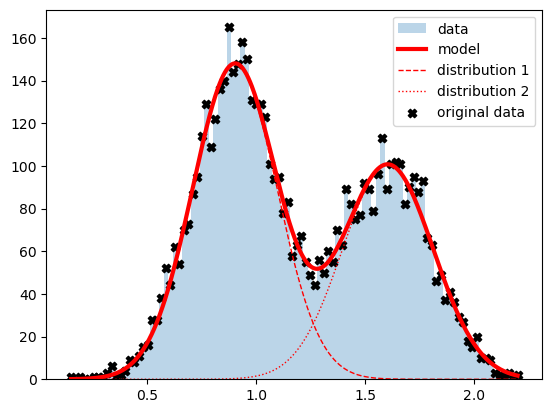

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

#data generation
np.random.seed(123)
data = np.concatenate((np.random.normal(.9, .2, 3500), np.random.normal(1.6, .2, 2500)))
y,x,_= plt.hist(data, 100, alpha=.3, label='data')
x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

#x, y inputs can be lists or 1D numpy arrays

def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/2/sigma**2)

def bimodal(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return gauss(x,mu1,sigma1,A1) + gauss(x,mu2,sigma2,A2)

expected = (.8, .2, 250, 1.8, .2, 125)
params, cov = curve_fit(bimodal, x, y, expected)
sigma = np.sqrt(np.diag(cov))
x_fit = np.linspace(x.min(), x.max(), 500)
#plot combined...
plt.plot(x_fit, bimodal(x_fit, *params), color='red', lw=3, label='model')
#...and individual Gauss curves
plt.plot(x_fit, gauss(x_fit, *params[:3]), color='red', lw=1, ls="--", label='distribution 1')
plt.plot(x_fit, gauss(x_fit, *params[3:]), color='red', lw=1, ls=":", label='distribution 2')
#and the original data points if no histogram has been created before
plt.scatter(x, y, marker="X", color="black", label="original data")
plt.legend()
print(pd.DataFrame(data={'params': params, 'sigma': sigma}, index=bimodal.__code__.co_varnames[1:]))
plt.show() 

(0.9029628377210909, 0.0020159130483440495, 0.0005729815563985407)

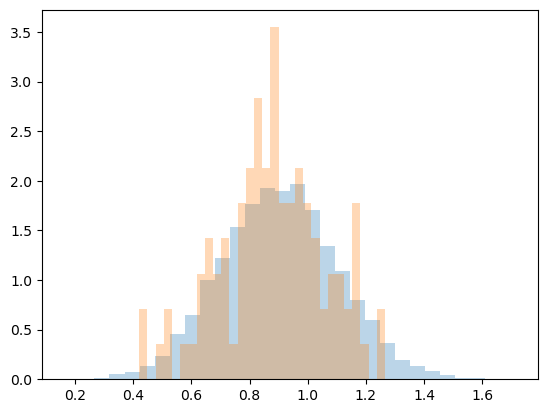

In [ ]:
# import numpy as np
# from scipy.stats import sem
a = np.random.normal(.9, .2, 10000)
plt.hist(a, 30, alpha=.3, density=True)
plt.hist(a[:100], 30, alpha=.3, density=True)
# plt.plot(np.arange(len(a)), a, alpha=.3)
a.mean(), sem(a), sem(a[:100])/1000**.5